<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#GBR-Modelling" data-toc-modified-id="GBR-Modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GBR Modelling</a></span></li><li><span><a href="#GBR-modelling-using-pipeline" data-toc-modified-id="GBR-modelling-using-pipeline-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GBR modelling using pipeline</a></span></li><li><span><a href="#Cross-Validation-Results" data-toc-modified-id="Cross-Validation-Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cross Validation Results</a></span></li><li><span><a href="#HPO-(Hyper-Parameters-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameters-Optimization)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO (Hyper Parameters Optimization)</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-for-Gradient-Boosting-Regressor" data-toc-modified-id="Grid-Search-for-Gradient-Boosting-Regressor-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Grid Search for Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor" data-toc-modified-id="Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hyper Parameter using hyperopt-sklearn for Gradient Boosting Regressor</a></span></li><li><span><a href="#Scale-data-for-hyperparameter-tuning" data-toc-modified-id="Scale-data-for-hyperparameter-tuning-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Scale data for hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#HPO-without-scaling-the-data" data-toc-modified-id="HPO-without-scaling-the-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>HPO without scaling the data</a></span></li></ul></li></ul></div>

# Data Description

This dataset contains 90 flags and 77 parameters.
The flags are cateogorical type, either true or false.

Task: Estimate the flux of the object



## Model Introduction
The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms:
```
sklearn.ensemble.GradientBoostingRegressor
xgboost.XGBRegressor # fast and best
lightgbm.LGBMRegressor # extreme fast, little acc than xgb
catboost.CatBoostRegressor # good for categorical feats
```

- [catboost examples](https://catboost.ai/docs/concepts/python-usages-examples.html)

# Imports

In [0]:
%%capture
# capture will not print in notebook

import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    # ## mount google drive
    from google.colab import drive
    drive.mount('/content/drive')
    dat_dir = 'drive/My Drive/Colab Notebooks/data/'
    sys.path.append(dat_dir)

    # # Also install my custom module
    # module_dir = 'drive/My Drive/Colab Notebooks/Bhishan_Modules/' 
    # sys.path.append(module_dir)
    # !cd drive/My Drive/Colab Notebooks/Bhishan_Modules/
    # !pip install -e bhishan
    # !cd -
    
    # pip install
    #!pip install pyldavis
    # !pip install hyperopt
    !pip install catboost
    !pip install shap
    !pip install eli5
    #!pip install lime
    # !pip install category_encoders # TargetEncoder
    # !pip install optuna # hyper param opt

    # faster pandas
    # df['x'].swifter.apply(myfunc)
    # df[['x','y']].swifter.apply(myfunc,pos_arg,keyword_arg=mykeyword_arg)
    # !pip install swifter
    
    # update modules
    # !pip install -U scikit-learn

    # Note: We need to restart kernel to use tqdm
    # from tqdm.notebook import trange, tqdm
    # tqdm.pandas()
    # out = df['A'].progress_apply(myfunc)
    # !pip install -U tqdm

    # print
    print('Environment: Google Colaboratory.')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.options.display.float_format = '{:,}'.format # df.A.value_counts().astype(float)
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.2')]


In [3]:
import scipy
import sklearn

print([(x.__name__,x.__version__) for x in [scipy, sklearn]])

[('scipy', '1.3.3'), ('sklearn', '0.21.3')]


In [0]:
# scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# pipeline
from sklearn.pipeline import Pipeline

In [6]:
# boosting
import xgboost as xgb
import lightgbm as lgb
import catboost

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier, DMatrix
from lightgbm import LGBMClassifier, Dataset
from catboost import CatBoostClassifier, Pool, CatBoost

print([(x.__name__,x.__version__) for x in [xgb, lgb,catboost]])

[('xgboost', '0.90'), ('lightgbm', '2.2.3'), ('catboost', '0.20.1')]


In [0]:
# six and pickle
import six
import pickle
import joblib

In [0]:
# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [0]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [0]:
df_eval = pd.DataFrame({'Model': [],
                        'Details':[],
                        'Train Neg MSE K-Fold Cross Validation':[],
                        'Test RMSE':[],
                        'Test Explained Variance Score':[],
                        'Test R-squared':[],
                        'Test Adjusted R-squared':[],
                        })

In [0]:
# model evaluation using snap
import shap
# shap_values = shap.TreeExplainer(model_xgb).shap_values(Xtest)
# shap.summary_plot(shap_values, Xtest)
# shap.dependence_plot("column_name", shap_values, Xtest)

# Important Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [0]:
def adjustedR2(rsquared,nrows,kcols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

# Load the data

In [14]:
ifile = dat_dir + '/flux/processed_0.h5'
df = pd.read_hdf(ifile,key='processed')
print(df.shape)
display(df.info(verbose=False, memory_usage="deep"))

df.head()

(6830, 47)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6830 entries, 6 to 7572
Columns: 47 entries, # calib_detected to base_ClassificationExtendedness_value
dtypes: float32(35), int8(12)
memory usage: 1.0 MB


None

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
6                  0                       0                     1   
7                  0                       0                     1   
14                 0                       0                     1   
16                 0                       0                     1   
21                 0                       0                     0   

    deblend_rampedTemplate  base_SdssShape_flag  base_SdssShape_flag_shift  \
6                        0                    0                          0   
7                        0                    0                          0   
14                       0                    0                          0   
16                       0                    0                          0   
21                       0                    0                          0   

    ext_shapeHSM_HsmShapeRegauss_flag  \
6                                   1   
7                                   1   
14                                  1   
16                                  1   
21                                  1   

    ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
6                                                 1   
7                                                 1   
14                                                1   
16                                                1   
21                                                0   

    ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
6                                          0                          1   
7                                          0                          1   
14                                         0                          1   
16                                         0                          1   
21                                         1                          1   

    base_Variance_flag  base_Variance_flag_emptyFootprint  \
6                    0                                  0   
7                    0                                  0   
14                   0                                  0   
16                   0                                  0   
21                   0                                  0   

                coord_ra             coord_dec  parent  deblend_nChild  \
6  0.0019000000320374966                   0.0     0.0             3.0   
7  0.0017999999690800905                   0.0     0.0             2.0   
14 0.0006000000284984708 9.999999747378752e-05     0.0             3.0   
16 0.0024999999441206455                   0.0     0.0             3.0   
21 0.0010000000474974513                   0.0     0.0             0.0   

    base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
6       1,671.9478759765625       28.217100143432617    1,671.065673828125   
7         1,782.08544921875       32.915401458740234   1,782.0118408203125   
14        2,952.80908203125        53.15800094604492    2,952.049560546875   
16        989.6881713867188       26.528900146484375     989.0255126953125   
21        2,529.72802734375       22.630599975585938    2,529.062744140625   

    base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
6     27.989900588989258  1,671.9385986328125   28.143999099731445   
7      32.06269836425781    1,782.11962890625    32.81840133666992   
14     53.00669860839844    2,952.82861328125    53.12919998168945   
16     26.02549934387207    989.9041137695312   26.556400299072266   
21     22.03700065612793         2,529.734375   22.628400802612305   

    base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
6         0.0869000032544136        0.0877000018954277 11.427900314331055   
7        0.08669999986886978          0.09009999781847 11.542099952697754   
14      0.044199999421834946      0.042500000447034836  12.85159969329834   
16       0.05510000139474869       0.04490000009536743  75.09269714355469  

In [15]:
df.columns.to_numpy()

array(['# calib_detected', 'deblend_deblendedAsPsf',
       'deblend_tooManyPeaks', 'deblend_rampedTemplate',
       'base_SdssShape_flag', 'base_SdssShape_flag_shift',
       'ext_shapeHSM_HsmShapeRegauss_flag',
       'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
       'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
       'base_PixelFlags_flag_edge', 'base_Variance_flag',
       'base_Variance_flag_emptyFootprint', 'coord_ra', 'coord_dec',
       'parent', 'deblend_nChild', 'base_GaussianCentroid_x',
       'base_GaussianCentroid_y', 'base_NaiveCentroid_x',
       'base_NaiveCentroid_y', 'base_SdssCentroid_x',
       'base_SdssCentroid_y', 'base_SdssCentroid_xSigma',
       'base_SdssCentroid_ySigma', 'base_SdssShape_xx',
       'base_SdssShape_yy', 'base_SdssShape_xy', 'base_SdssShape_xxSigma',
       'base_SdssShape_yySigma', 'base_SdssShape_xySigma',
       'base_SdssShape_x', 'base_SdssShape_y', 'base_SdssShape_psf_xx',
       'base_SdssShape_psf_yy', 'base_SdssShape_psf_xy',


In [16]:
cat_features = ['# calib_detected', 'deblend_deblendedAsPsf',
       'deblend_tooManyPeaks', 'deblend_rampedTemplate',
       'base_SdssShape_flag', 'base_SdssShape_flag_shift',
       'ext_shapeHSM_HsmShapeRegauss_flag',
       'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
       'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
       'base_PixelFlags_flag_edge', 'base_Variance_flag',
       'base_Variance_flag_emptyFootprint']

cat_features_idx = [df.columns.get_loc(c) for c in cat_features]
cat_features_idx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [17]:
df[cat_features] = df[cat_features].astype(np.int8)
df.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
6                 0                       0                     1   
7                 0                       0                     1   

   deblend_rampedTemplate  base_SdssShape_flag  base_SdssShape_flag_shift  \
6                       0                    0                          0   
7                       0                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
6                                  1   
7                                  1   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
6                                                1   
7                                                1   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
6                                         0                          1   
7                                         0                          1   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
6                   0                                  0   
7                   0                                  0   

               coord_ra  coord_dec  parent  deblend_nChild  \
6 0.0019000000320374966        0.0     0.0             3.0   
7 0.0017999999690800905        0.0     0.0             2.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
6      1,671.9478759765625       28.217100143432617    1,671.065673828125   
7        1,782.08544921875       32.915401458740234   1,782.0118408203125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
6    27.989900588989258  1,671.9385986328125   28.143999099731445   
7     32.06269836425781    1,782.11962890625    32.81840133666992   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
6        0.0869000032544136        0.0877000018954277 11.427900314331055   
7       0.08669999986886978          0.09009999781847 11.542099952697754   

   base_SdssShape_yy    base_SdssShape_xy  base_SdssShape_xxSigma  \
6 11.291399955749512   0.8927000164985657     0.48969998955726624   
7 12.422200202941895 -0.16859999299049377      0.5001999735832214   

   base_SdssShape_yySigma  base_SdssShape_xySigma   base_SdssShape_x  \
6     0.34529998898506165      0.4839000105857849 1,671.941650390625   
7       0.367000013589859      0.5382999777793884  1,782.11767578125   

    base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
6 28.171499252319336     12.173199653625488      12.25469970703125   
7 32.838401794433594     12.177599906921387     12.248299598693848   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
6      0.776199996471405       -0.00019999999494757503   
7     0.7802000045776367       -0.00019999999494757503   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
6       -0.00019999999494757503             12.178999900817871   
7       -0.00019999999494757503             12.183300018310547   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
6              12.26039981842041             0.7760999798774719   
7             12.253899574279785             0.7799999713897705   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
6               1,678.829345703125                21.18939971923828   
7              1,784.5943603515625               28.037399291992188   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
6                 138.0001983642578                124.21060180664062   
7                31.745500564575195                 84.89839935302734   

   ext_shapeHSM_HsmSourceMoments_xy  base_GaussianFlux_flux  \
6               -112.09300231933594          8,817.92578125   
7                 -34.8739013671875       7,491.68115234375   

   base_ClassificationExtendedness_value  
6                                    1.0  
7                                    1.0

In [18]:
df[cat_features].apply(pd.Series.nunique)

# calib_detected                                   2
deblend_deblendedAsPsf                             2
deblend_tooManyPeaks                               2
deblend_rampedTemplate                             2
base_SdssShape_flag                                2
base_SdssShape_flag_shift                          2
ext_shapeHSM_HsmShapeRegauss_flag                  2
ext_shapeHSM_HsmShapeRegauss_flag_parent_source    2
ext_shapeHSM_HsmShapeRegauss_flag_galsim           2
base_PixelFlags_flag_edge                          2
base_Variance_flag                                 2
base_Variance_flag_emptyFootprint                  2
dtype: int64

In [19]:
df[cat_features].apply(pd.Series.nunique).sum()

24

In [20]:
for col in cat_features:
  print(df[col].value_counts())

0    6417
1     413
Name: # calib_detected, dtype: int64
0    4231
1    2599
Name: deblend_deblendedAsPsf, dtype: int64
0    5812
1    1018
Name: deblend_tooManyPeaks, dtype: int64
0    6817
1      13
Name: deblend_rampedTemplate, dtype: int64
0    6790
1      40
Name: base_SdssShape_flag, dtype: int64
0    6790
1      40
Name: base_SdssShape_flag_shift, dtype: int64
1    3447
0    3383
Name: ext_shapeHSM_HsmShapeRegauss_flag, dtype: int64
0    5812
1    1018
Name: ext_shapeHSM_HsmShapeRegauss_flag_parent_source, dtype: int64
0    4401
1    2429
Name: ext_shapeHSM_HsmShapeRegauss_flag_galsim, dtype: int64
0    6728
1     102
Name: base_PixelFlags_flag_edge, dtype: int64
0    5875
1     955
Name: base_Variance_flag, dtype: int64
0    5875
1     955
Name: base_Variance_flag_emptyFootprint, dtype: int64


# Train-Test split

In [21]:
target = 'base_GaussianFlux_flux'
X = df.drop(target,axis=1).to_numpy()


y = df[target].to_numpy()

Xtrain_orig, Xtest, ytrain_orig, ytest = train_test_split (X,y,
                                                 test_size=0.20,
                                                 random_state=SEED)

df_Xtrain_orig = pd.DataFrame(Xtrain_orig, columns=df.columns.drop(target))
df_Xtest = pd.DataFrame(Xtest, columns=df.columns.drop(target))

a = [Xtrain_orig.shape, ytrain_orig.shape,
     Xtest.shape, ytest.shape, Xtrain_orig[0][:2],
     Xtest[0][:2]]
print(a)

df_Xtest.head(2)

[(5464, 46), (5464,), (1366, 46), (1366,), array([0., 0.], dtype=float32), array([0., 1.], dtype=float32)]


# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0               0.0                     1.0                   0.0   
1               0.0                     1.0                   0.0   

   deblend_rampedTemplate  base_SdssShape_flag  base_SdssShape_flag_shift  \
0                     0.0                  0.0                        0.0   
1                     0.0                  0.0                        0.0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                0.0   
1                                0.0   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                              0.0   
1                                              0.0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                       0.0                        0.0   
1                                       0.0                        0.0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                 0.0                                0.0   
1                 0.0                                0.0   

               coord_ra            coord_dec  parent  deblend_nChild  \
0 0.0008999999845400453 0.003100000089034438 2,350.0             0.0   
1 0.0015999999595806003 0.003000000026077032 2,268.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0       2,679.167236328125       3,224.177978515625    2,679.016357421875   
1      1,998.4669189453125           3,120.99609375     1,998.02880859375   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     3,224.02880859375   2,679.175537109375    3,224.17236328125   
1     3,120.97509765625  1,998.4727783203125   3,121.010009765625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0       0.09539999812841415       0.11479999870061874 11.751700401306152   
1       0.14569999277591705       0.16740000247955322 10.887499809265137   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0 17.318300247192383  0.991100013256073      0.5406000018119812   
1 14.068900108337402 1.1395000219345093      0.8068000078201294   

   base_SdssShape_yySigma  base_SdssShape_xySigma  base_SdssShape_x  \
0      0.4650999903678894      0.7965999841690063  2,679.1630859375   
1      0.6513000130653381      1.0426000356674194    1,998.47265625   

    base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0  3,224.15966796875     12.084600448608398     11.878100395202637   
1 3,120.998779296875     12.006199836730957     11.923299789428711   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     1.0347000360488892         9.999999747378752e-05   
1      1.067199945449829                          -0.0   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0                           0.0             12.091099739074707   
1                          -0.0             12.012800216674805   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             11.884300231933594              1.034600019454956   
1             11.929699897766113             1.0672999620437622   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                  2,679.150390625                  3,224.146484375   
1                 1,998.4736328125               3,120.985595703125   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                 11.76930046081543                 17.35409927368164   
1                10.869500160217285                14.034299850463867   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                0.9948999881744385                                    1.0  
1                1.1539000272750854                                    0.0

# Train-Validation Split

In [22]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain_orig, ytrain_orig,
                                                  random_state=SEED, test_size=0.2)

df_Xtrain = pd.DataFrame(Xtrain, columns=df.columns.drop(target))
df_Xvalid = pd.DataFrame(Xvalid, columns=df.columns.drop(target))


df_Xtrain.head()

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0               0.0                     0.0                   1.0   
1               0.0                     1.0                   0.0   
2               0.0                     0.0                   0.0   
3               0.0                     0.0                   0.0   
4               0.0                     0.0                   0.0   

   deblend_rampedTemplate  base_SdssShape_flag  base_SdssShape_flag_shift  \
0                     0.0                  0.0                        0.0   
1                     0.0                  0.0                        0.0   
2                     0.0                  0.0                        0.0   
3                     0.0                  0.0                        0.0   
4                     0.0                  0.0                        0.0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                1.0   
1                                1.0   
2                                1.0   
3                                0.0   
4                                0.0   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                              1.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                       0.0                        0.0   
1                                       1.0                        0.0   
2                                       1.0                        0.0   
3                                       0.0                        0.0   
4                                       0.0                        0.0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                 0.0                                0.0   
1                 0.0                                0.0   
2                 0.0                                0.0   
3                 1.0                                1.0   
4                 0.0                                0.0   

               coord_ra              coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516  0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003  0.0024999999441206455 1,879.0             0.0   
2 0.0027000000700354576  0.0031999999191612005     0.0             0.0   
3  0.002899999963119626 0.00019999999494757503   248.0             0.0   
4  0.002899999963119626   0.002099999925121665 1,550.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   
2         846.894775390625          3,346.814453125     845.9362182617188   
3        637.8670043945312       203.15440368652344      637.048583984375   
4        566.4299926757812       2,193.316650390625     566.0280151367188   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   
2     3,346.00927734375      846.87939453125    3,346.81103515625   
3    203.00729370117188    637.8685913085938    203.1540985107422   
4    2,193.019287109375    566.4307861328125   2,193.316162109375   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   
2       0.15279999375343323        0.1543000042438507 11.022100448608398   
3      0.016300000250339508      0.016699999570846558  12.60949993133545   
4      0.015799999237060547       0.01720000058412

# Columns with more than one unique values

In [23]:
# make sure columns have more than 1 unique values
s1 = df_Xtrain[cat_features].apply(pd.Series.nunique).sum()
s2 = df_Xtest[cat_features].apply(pd.Series.nunique).sum()
s3 = df_Xvalid[cat_features].apply(pd.Series.nunique).sum()

s1,s2,s3

(24, 24, 23)

In [24]:
df_Xvalid[cat_features].apply(pd.Series.nunique)

# calib_detected                                   2
deblend_deblendedAsPsf                             2
deblend_tooManyPeaks                               2
deblend_rampedTemplate                             1
base_SdssShape_flag                                2
base_SdssShape_flag_shift                          2
ext_shapeHSM_HsmShapeRegauss_flag                  2
ext_shapeHSM_HsmShapeRegauss_flag_parent_source    2
ext_shapeHSM_HsmShapeRegauss_flag_galsim           2
base_PixelFlags_flag_edge                          2
base_Variance_flag                                 2
base_Variance_flag_emptyFootprint                  2
dtype: int64

In [0]:
cols_drop = ['deblend_rampedTemplate']
df_Xtrain.drop(cols_drop,axis=1,inplace=True)
df_Xtest.drop(cols_drop,axis=1,inplace=True)
df_Xvalid.drop(cols_drop,axis=1,inplace=True)

In [0]:
Xtrain = df_Xtrain.to_numpy()
Xtest = df_Xtest.to_numpy()
Xvalid = df_Xvalid.to_numpy()

In [27]:
cat_features = [i for i in cat_features if i not in ['deblend_rampedTemplate']]
cat_features

['# calib_detected',
 'deblend_deblendedAsPsf',
 'deblend_tooManyPeaks',
 'base_SdssShape_flag',
 'base_SdssShape_flag_shift',
 'ext_shapeHSM_HsmShapeRegauss_flag',
 'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
 'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
 'base_PixelFlags_flag_edge',
 'base_Variance_flag',
 'base_Variance_flag_emptyFootprint']

In [28]:
cat_features_idx = [df.columns.get_loc(c) for c in cat_features]
cat_features_idx

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]

In [29]:
df_Xtrain.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0               0.0                     0.0                   1.0   
1               0.0                     1.0                   0.0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                  0.0                        0.0   
1                  0.0                        0.0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                1.0   
1                                1.0   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                              1.0   
1                                              0.0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                       0.0                        0.0   
1                                       1.0                        0.0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                 0.0                                0.0   
1                 0.0                                0.0   

               coord_ra             coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516 0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003 0.0024999999441206455 1,879.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0  11.58080005645752 1.4122999906539917     0.17260000109672546   
1  9.030599594116211 0.8830000162124634     0.29820001125335693   

   base_SdssShape_yySigma  base_SdssShape_xySigma    base_SdssShape_x  \
0     0.12700000405311584     0.18400000035762787    915.151123046875   
1     0.21940000355243683       0.319599986076355 1,997.1104736328125   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0   516.87060546875      11.73289966583252     12.412500381469727   
1   2,583.466796875     11.803999900817871     12.268799781799316   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     0.8263000249862671       -0.00039999998989515007   
1      1.048200011253357        -0.0003000000142492354   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0       -0.00019999999494757503             11.739100456237793   
1       -0.00019999999494757503               11.8100004196167   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             12.418100357055664             0.8263999819755554   
1             12.274100303649902               1.04830002784729   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                915.1495971679688                516.8607177734375   
1               1,997.110595703125               2,583.470458984375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                10.874699592590332                11.610799789428711   
1                 8.431900024414062                 9.038900375366211   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                1.4133000373840332                                    0.0  
1                0.8842999935150146                                    0.0

# Make categorical features integer

In [30]:
df_Xtrain[cat_features] = df_Xtrain[cat_features].astype(np.int8)
df_Xtest[cat_features] = df_Xtest[cat_features].astype(np.int8)
df_Xvalid[cat_features] = df_Xvalid[cat_features].astype(np.int8)

df_Xtrain.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0                 0                       0                     1   
1                 0                       1                     0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                    0                          0   
1                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                  1   
1                                  1   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                                1   
1                                                0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                         0                          0   
1                                         1                          0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                   0                                  0   
1                   0                                  0   

               coord_ra             coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516 0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003 0.0024999999441206455 1,879.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0  11.58080005645752 1.4122999906539917     0.17260000109672546   
1  9.030599594116211 0.8830000162124634     0.29820001125335693   

   base_SdssShape_yySigma  base_SdssShape_xySigma    base_SdssShape_x  \
0     0.12700000405311584     0.18400000035762787    915.151123046875   
1     0.21940000355243683       0.319599986076355 1,997.1104736328125   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0   516.87060546875      11.73289966583252     12.412500381469727   
1   2,583.466796875     11.803999900817871     12.268799781799316   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     0.8263000249862671       -0.00039999998989515007   
1      1.048200011253357        -0.0003000000142492354   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0       -0.00019999999494757503             11.739100456237793   
1       -0.00019999999494757503               11.8100004196167   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             12.418100357055664             0.8263999819755554   
1             12.274100303649902               1.04830002784729   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                915.1495971679688                516.8607177734375   
1               1,997.110595703125               2,583.470458984375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                10.874699592590332                11.610799789428711   
1                 8.431900024414062                 9.038900375366211   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                1.4133000373840332                                    0.0  
1                0.8842999935150146                                    0.0

In [31]:
df_Xtrain[cat_features].apply(pd.Series.nunique)

# calib_detected                                   2
deblend_deblendedAsPsf                             2
deblend_tooManyPeaks                               2
base_SdssShape_flag                                2
base_SdssShape_flag_shift                          2
ext_shapeHSM_HsmShapeRegauss_flag                  2
ext_shapeHSM_HsmShapeRegauss_flag_parent_source    2
ext_shapeHSM_HsmShapeRegauss_flag_galsim           2
base_PixelFlags_flag_edge                          2
base_Variance_flag                                 2
base_Variance_flag_emptyFootprint                  2
dtype: int64

# Make Boosting Data Type

In [0]:
dtrain = Pool(df_Xtrain, ytrain, cat_features=cat_features)
dvalid = Pool(df_Xvalid, yvalid, cat_features=cat_features)
dtest = Pool(df_Xtest, ytest, cat_features=cat_features)

# Modelling catboost
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html
```python
class CatBoostRegressor(iterations=None,learning_rate=None,depth=None,
l2_leaf_reg=None,model_size_reg=None,rsm=None,loss_function='RMSE',
border_count=None,feature_border_type=None
per_float_feature_quantization=None,input_borders=None,
output_borders=None,fold_permutation_block=None,od_pval=None,
od_wait=None,od_type=None,nan_mode=None,counter_calc_method=None,
leaf_estimation_iterations=None,leaf_estimation_method=None,
thread_count=None,random_seed=None,use_best_model=None,
best_model_min_trees=None,verbose=None,silent=None,logging_level=None,
metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
max_ctr_complexity=None,
has_time=None,allow_const_label=None,one_hot_max_size=None,
random_strength=None,name=None,ignored_features=None,
train_dir=None,custom_metric=None,eval_metric=None,
bagging_temperature=None,save_snapshot=None,
snapshot_file=None,snapshot_interval=None,
fold_len_multiplier=None,used_ram_limit=None,gpu_ram_part=None,
pinned_memory_size=None,allow_writing_files=None,
final_ctr_computation_mode=None,approx_on_full_history=None,
boosting_type=None,simple_ctr=None,combinations_ctr=None,
per_feature_ctr=None,ctr_target_border_count=None,task_type=None,
device_config=None,devices=None,bootstrap_type=None,subsample=None,
sampling_unit=None,dev_score_calc_obj_block_size=None,
max_depth=None,n_estimators=None,num_boost_round=None,
num_trees=None,colsample_bylevel=None,random_state=None,
reg_lambda=None,objective=None,eta=None,max_bin=None,
gpu_cat_features_storage=None,data_partition=None,
metadata=None,early_stopping_rounds=None,cat_features=None,
grow_policy=None,min_data_in_leaf=None,min_child_samples=None,
max_leaves=None,num_leaves=None,score_function=None,
leaf_estimation_backtracking=None,ctr_history_unit=None,
monotone_constraints=None)
```


In [33]:
import catboost
show_method_attributes(catboost)

Object Type: <class 'module'>



0                  1             2                 3  \
0            CatBoost  CatBoostRegressor     EFstrType  MetricVisualizer   
1  CatBoostClassifier      CatboostError  FeaturesData              Pool   
2       CatBoostError                                                      

      4           5        6  
0  core  sum_models  version  
1    cv       train   widget  
2

In [34]:
from catboost import CatBoostRegressor, Pool

show_method_attributes(CatBoostRegressor)

Object Type: <class 'type'>



0                     1                        2  \
0          best_iteration_  drop_unused_features       get_best_iteration   
1              best_score_          eval_metrics           get_best_score   
2  calc_feature_statistics         evals_result_              get_borders   
3        calc_leaf_indexes  feature_importances_  get_cat_feature_indices   
4                 classes_        feature_names_         get_evals_result   
5                  compare                   fit   get_feature_importance   
6                     copy        get_all_params          get_leaf_values   
7     create_metric_calcer                                                  

                       3                         4                  5  \
0       get_leaf_weights  get_text_feature_indices   plot_predictions   
1           get_metadata      get_tree_leaf_counts          plot_tree   
2  get_object_importance               grid_search            predict   
3              get_param                 is_fitted       random_seed_   
4             get_params      iterate_leaf_indexes  randomized_search   
5          get_test_eval            learning_rate_       save_borders   
6         get_test_evals                load_model         save_model   
7                                                                       

                   6  
0              score  
1  set_feature_names  
2    set_leaf_values  
3         set_params  
4             shrink  
5     staged_predict  
6        tree_count_  
7

In [0]:
# help(CatBoostRegressor)

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from catboost import CatBoostRegressor

# time
time_start = time.time()

# current parameters
Xtr = df_Xtrain
Xtx = df_Xtest
Xvd = df_Xvalid

ytr,ytx,yvd = ytrain, ytest,yvalid


# fit the model
model = CatBoostRegressor(random_state=SEED,verbose=1000)
model.fit(Xtr, ytr,
          eval_set=(Xvd, yvd),
          cat_features=cat_features,
          use_best_model=True)


# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2, 6)

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adusted R-squared value ', ar2)

0:	learn: 54375.0028116	test: 51054.1585583	best: 51054.1585583 (0)	total: 73.8ms	remaining: 1m 13s
999:	learn: 1031.3474889	test: 5529.0789749	best: 5529.0789749 (999)	total: 8.66s	remaining: 0us

bestTest = 5529.078975
bestIteration = 999

0:	learn: 48101.5495400	total: 8.87ms	remaining: 8.86s
999:	learn: 528.1518338	total: 7.81s	remaining: 0us
0:	learn: 48848.1213709	total: 8.8ms	remaining: 8.79s
999:	learn: 577.7521557	total: 7.73s	remaining: 0us
0:	learn: 52236.7504368	total: 8.92ms	remaining: 8.91s
999:	learn: 587.0678897	total: 7.77s	remaining: 0us
0:	learn: 50571.6612128	total: 9.71ms	remaining: 9.7s
999:	learn: 593.3062401	total: 7.77s	remaining: 0us
0:	learn: 46702.7964472	total: 8.58ms	remaining: 8.57s
999:	learn: 551.8032672	total: 7.78s	remaining: 0us
Time taken: 0 min 49 secs
Adusted R-squared value  0.9279


# Feature Statistics
- [catboost tutorials model analysis feature statistics tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/feature_statistics_tutorial.ipynb)

In [37]:
df_Xtrain.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0                 0                       0                     1   
1                 0                       1                     0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                    0                          0   
1                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                  1   
1                                  1   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                                1   
1                                                0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                         0                          0   
1                                         1                          0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                   0                                  0   
1                   0                                  0   

               coord_ra             coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516 0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003 0.0024999999441206455 1,879.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0  11.58080005645752 1.4122999906539917     0.17260000109672546   
1  9.030599594116211 0.8830000162124634     0.29820001125335693   

   base_SdssShape_yySigma  base_SdssShape_xySigma    base_SdssShape_x  \
0     0.12700000405311584     0.18400000035762787    915.151123046875   
1     0.21940000355243683       0.319599986076355 1,997.1104736328125   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0   516.87060546875      11.73289966583252     12.412500381469727   
1   2,583.466796875     11.803999900817871     12.268799781799316   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     0.8263000249862671       -0.00039999998989515007   
1      1.048200011253357        -0.0003000000142492354   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0       -0.00019999999494757503             11.739100456237793   
1       -0.00019999999494757503               11.8100004196167   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             12.418100357055664             0.8263999819755554   
1             12.274100303649902               1.04830002784729   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                915.1495971679688                516.8607177734375   
1               1,997.110595703125               2,583.470458984375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                10.874699592590332                11.610799789428711   
1                 8.431900024414062                 9.038900375366211   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                1.4133000373840332                                    0.0  
1                0.8842999935150146                                    0.0

In [0]:
# float feature
# feature_name = 'base_GaussianCentroid_x'
# dict_stats = model.calc_feature_statistics(df_Xtrain, ytrain, feature_name, plot=True)
# plot = True does not work in gcolab

In [39]:
# one hot feature
feature_name = 'base_SdssShape_flag'
cat_vals = df_Xtrain[feature_name].unique().tolist()

dict_stats = model.calc_feature_statistics(df_Xtrain, ytrain, feature_name)

In [40]:
dict_stats.keys()

dict_keys(['binarized_feature', 'mean_target', 'mean_weighted_target', 'mean_prediction', 'objects_per_bin', 'predictions_on_varying_feature', 'cat_values'])

In [41]:
for key in dict_stats.keys():
    print(key, len(dict_stats[key]))

binarized_feature 4371
mean_target 2
mean_weighted_target 0
mean_prediction 2
objects_per_bin 2
predictions_on_varying_feature 2
cat_values 2


# Feature Importance


In [0]:
# show_method_attributes(model)

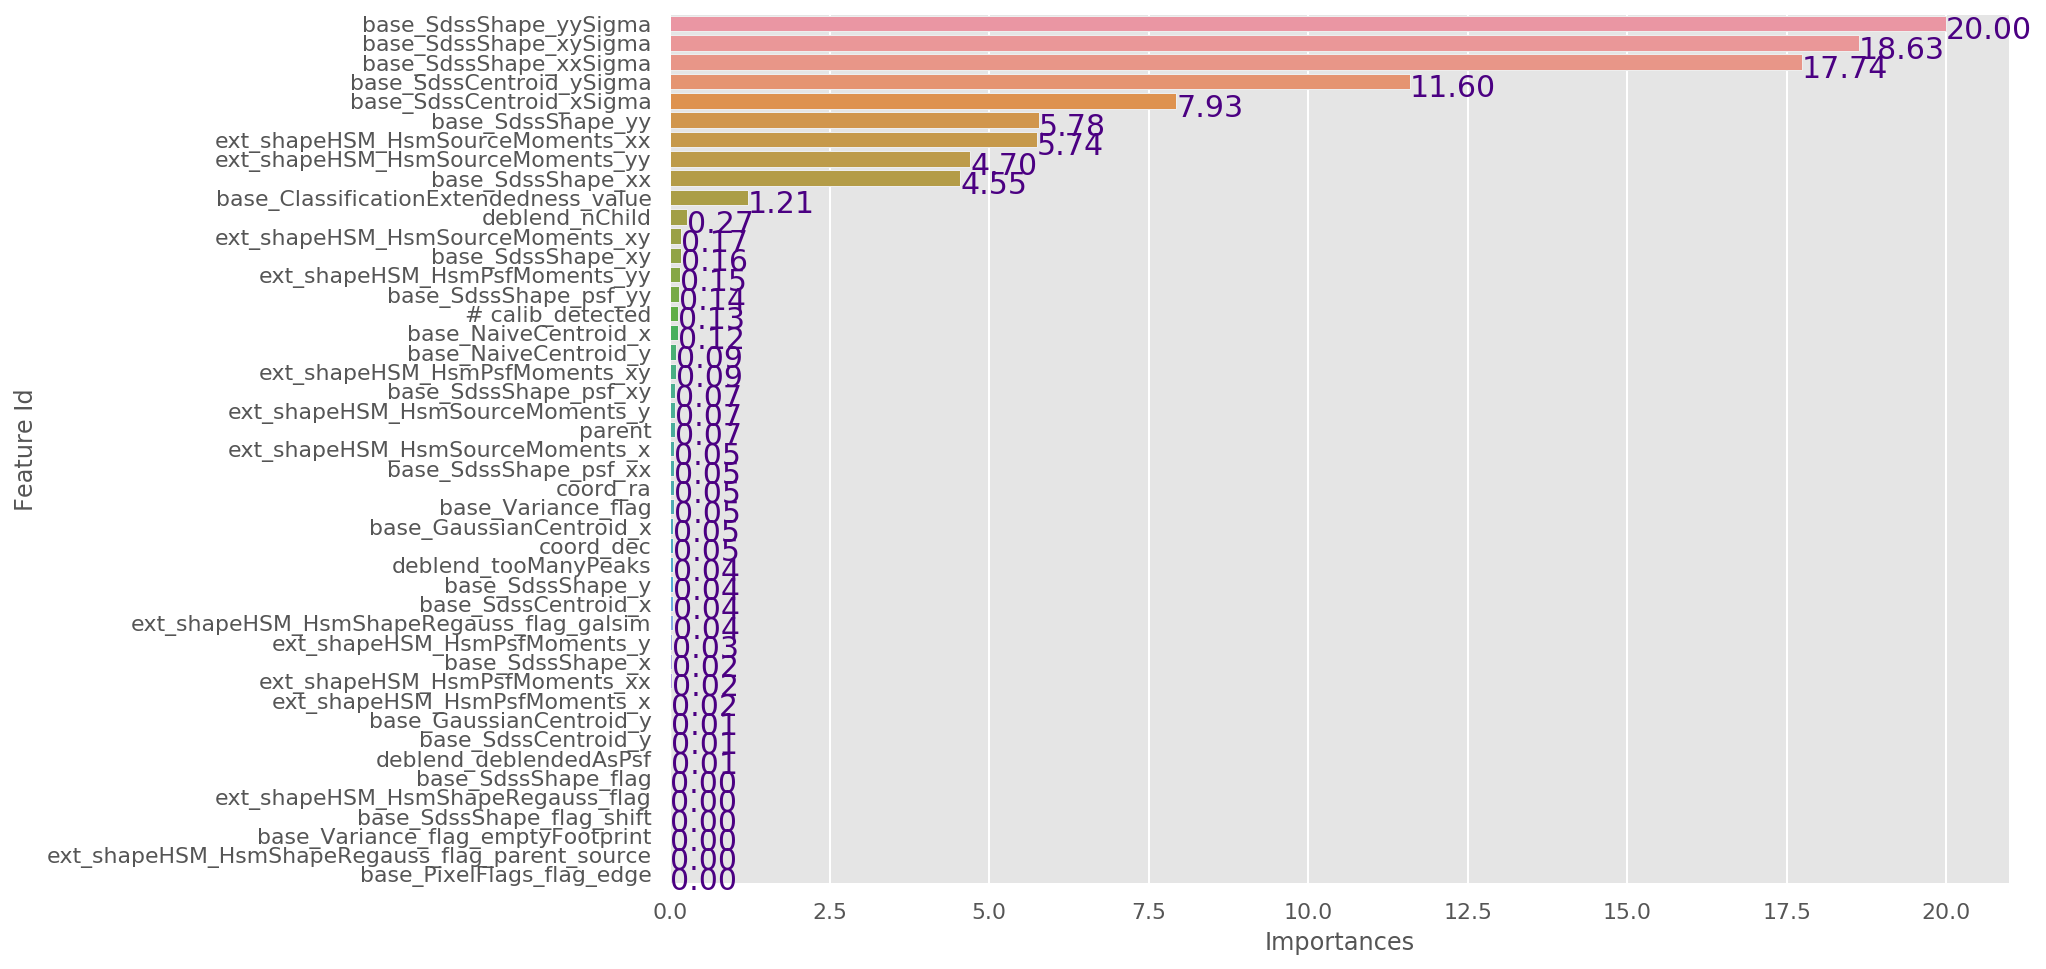

In [43]:
df_fimp = model.get_feature_importance(prettified=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Importances", y="Feature Id", data=df_fimp);

for p in ax.patches:
    x = p.get_width()
    y = p.get_y()
    text = '{:.2f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo',va='top',ha='left')

# Drop Low Importance Features

In [44]:
df_fimp.query("Importances < 0.02")

Feature Id            Importances
35                     ext_shapeHSM_HsmPsfMoments_x   0.015166383446389433
36                          base_GaussianCentroid_y   0.010503673608078256
37                              base_SdssCentroid_y   0.010320217017290563
38                           deblend_deblendedAsPsf  0.0055158867076329785
39                              base_SdssShape_flag  0.0012214072711252857
40                ext_shapeHSM_HsmShapeRegauss_flag  0.0004804746001925881
41                        base_SdssShape_flag_shift 0.00018439973699556944
42                base_Variance_flag_emptyFootprint  7.335541521405131e-05
43  ext_shapeHSM_HsmShapeRegauss_flag_parent_source                    0.0
44                        base_PixelFlags_flag_edge                    0.0

In [45]:
cols_low_feat_imp = df_fimp.query("Importances < 0.02")['Feature Id'].to_numpy().tolist()
cols_low_feat_imp

['ext_shapeHSM_HsmPsfMoments_x',
 'base_GaussianCentroid_y',
 'base_SdssCentroid_y',
 'deblend_deblendedAsPsf',
 'base_SdssShape_flag',
 'ext_shapeHSM_HsmShapeRegauss_flag',
 'base_SdssShape_flag_shift',
 'base_Variance_flag_emptyFootprint',
 'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
 'base_PixelFlags_flag_edge']

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from catboost import CatBoostRegressor

# time
time_start = time.time()

# current parameters
cat_features = [i for i in cat_features if i not in cols_low_feat_imp]
Xtr = df_Xtrain.drop(cols_low_feat_imp,axis=1)
Xtx = df_Xtest.drop(cols_low_feat_imp,axis=1)
Xvd = df_Xvalid.drop(cols_low_feat_imp,axis=1)

ytr,ytx,yvd = ytrain, ytest,yvalid


# fit the model
model = CatBoostRegressor(random_state=SEED,verbose=1000)
model.fit(Xtr, ytr,
          eval_set=(Xvd, yvd),
          cat_features=cat_features,
          use_best_model=True)

# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2, 6)

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adusted R-squared value ', ar2)

0:	learn: 54333.9242048	test: 51096.8673166	best: 51096.8673166 (0)	total: 9.57ms	remaining: 9.56s
999:	learn: 1032.0586715	test: 5545.4854695	best: 5544.2175077 (996)	total: 7.73s	remaining: 0us

bestTest = 5544.217508
bestIteration = 996

Shrink model to first 997 iterations.
0:	learn: 48212.2046022	total: 7.55ms	remaining: 7.54s
999:	learn: 554.1407086	total: 6.88s	remaining: 0us
0:	learn: 48791.2350303	total: 7.82ms	remaining: 7.81s
999:	learn: 593.3633929	total: 6.82s	remaining: 0us
0:	learn: 52270.4835557	total: 7.84ms	remaining: 7.83s
999:	learn: 530.0840630	total: 6.87s	remaining: 0us
0:	learn: 50637.3590496	total: 7.65ms	remaining: 7.64s
999:	learn: 508.9783554	total: 6.88s	remaining: 0us
0:	learn: 46650.1971261	total: 7.79ms	remaining: 7.79s
999:	learn: 558.3678979	total: 6.82s	remaining: 0us
Time taken: 0 min 43 secs
Adusted R-squared value  0.931253


# Metric Visualizer
- [metric visualizer](https://catboost.ai/docs/concepts/python-reference_catboostipythonwidget.html)

```python
import catboost
from catboost import CatBoostClassifier

# part 1: fit the model
cat_features = [0,1,2]

train_data = [["a", "b", 1, 4, 5, 6],
              ["a", "b", 4, 5, 6, 7],
              ["c", "d", 30, 40, 50, 60]]

train_labels = [1,1,0]

model = CatBoostClassifier(iterations=20, 
                           loss_function = "CrossEntropy", 
                           train_dir = "crossentropy")

model.fit(train_data, train_labels, cat_features)
predictions = model.predict(train_data)


# part 2: visualize
w = catboost.MetricVisualizer('/crossentropy/')
w.start()
```

Part 1 works in google colab and gives some files in the directory crossentroy but part2 keeps running for infinite time.



# catboost using Pool

- [object_importance_tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/object_importance_tutorial.ipynb)

In [0]:
from catboost import CatBoost, Pool

In [49]:
df_Xtrain.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0                 0                       0                     1   
1                 0                       1                     0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                    0                          0   
1                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                  1   
1                                  1   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                                1   
1                                                0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                         0                          0   
1                                         1                          0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                   0                                  0   
1                   0                                  0   

               coord_ra             coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516 0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003 0.0024999999441206455 1,879.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0  11.58080005645752 1.4122999906539917     0.17260000109672546   
1  9.030599594116211 0.8830000162124634     0.29820001125335693   

   base_SdssShape_yySigma  base_SdssShape_xySigma    base_SdssShape_x  \
0     0.12700000405311584     0.18400000035762787    915.151123046875   
1     0.21940000355243683       0.319599986076355 1,997.1104736328125   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0   516.87060546875      11.73289966583252     12.412500381469727   
1   2,583.466796875     11.803999900817871     12.268799781799316   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     0.8263000249862671       -0.00039999998989515007   
1      1.048200011253357        -0.0003000000142492354   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0       -0.00019999999494757503             11.739100456237793   
1       -0.00019999999494757503               11.8100004196167   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             12.418100357055664             0.8263999819755554   
1             12.274100303649902               1.04830002784729   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                915.1495971679688                516.8607177734375   
1               1,997.110595703125               2,583.470458984375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                10.874699592590332                11.610799789428711   
1                 8.431900024414062                 9.038900375366211   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                1.4133000373840332                                    0.0  
1                0.8842999935150146                                    0.0

In [50]:
params = {'iterations': 100, 'verbose': False, 'random_seed': 0}
bst_cat = CatBoost(params=params)
bst_cat.fit(dtrain);
print(bst_cat.eval_metrics(dvalid, ['RMSE'])['RMSE'][-1])

11822.602254037383


In [0]:
# show_method_attributes(bst_cat)

In [52]:
ypreds = bst_cat.predict(dtest)

# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2, 6)

print('Adusted R-squared value ', ar2)

Adusted R-squared value  0.967075


In [0]:
# bst_cat.plot_tree(tree_idx=0) # !!! Crashes Google Colab!!!

## Cross Validation
- [Catboost CV](https://catboost.ai/docs/concepts/python-usages-examples.html)
- [Catboost Jupyter Notebook visulization](https://catboost.ai/docs/features/visualization_jupyter-notebook.html)

```python
cv(pool=None, params=None, dtrain=None, iterations=None, 
num_boost_round=None, fold_count=None, nfold=None, inverted=False,
partition_random_seed=0, seed=None, shuffle=True, logging_level=None,
stratified=None, as_pandas=True, metric_period=None, verbose=None,
verbose_eval=None, plot=False, early_stopping_rounds=None,
save_snapshot=None, snapshot_file=None,
snapshot_interval=None, folds=None, type='Classical')
```

In [0]:
# help(catboost.cv)

In [55]:
params = {'iterations': 100, 'verbose': False, 'random_seed': 0}

df_scores = catboost.cv(dtrain,
            params,
            fold_count=2,
            verbose=100,
            plot="True") # plot does not work in google colab

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 59685.2161446	test: 59739.3114621	best: 59739.3114621 (0)	total: 90.8ms	remaining: 8.99s
99:	learn: 10514.6285888	test: 13435.0155855	best: 13435.0155855 (99)	total: 5.84s	remaining: 0us


In [56]:
print(df_scores.columns)
df_scores.head()

Index(['iterations', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean',
       'train-RMSE-std'],
      dtype='object')


iterations      test-RMSE-mean       test-RMSE-std     train-RMSE-mean  \
0           0  59,739.31146208745  2,614.500432387233  59,685.21614462249   
1           1 58,419.481482888164 2,604.5170911026885   58,347.8563306006   
2           2  57,189.48194067819 2,616.8677109152763 57,096.563168641456   
3           3  55,997.61245822237  2,512.896490926629  55,866.70841660295   
4           4  54,757.45874451691  2,513.716161662012  54,640.82027598382   

       train-RMSE-std  
0  2,703.594104727372  
1  2,641.167645481683  
2  2,577.342115777509  
3  2,598.467337614037  
4 2,510.3774769838433

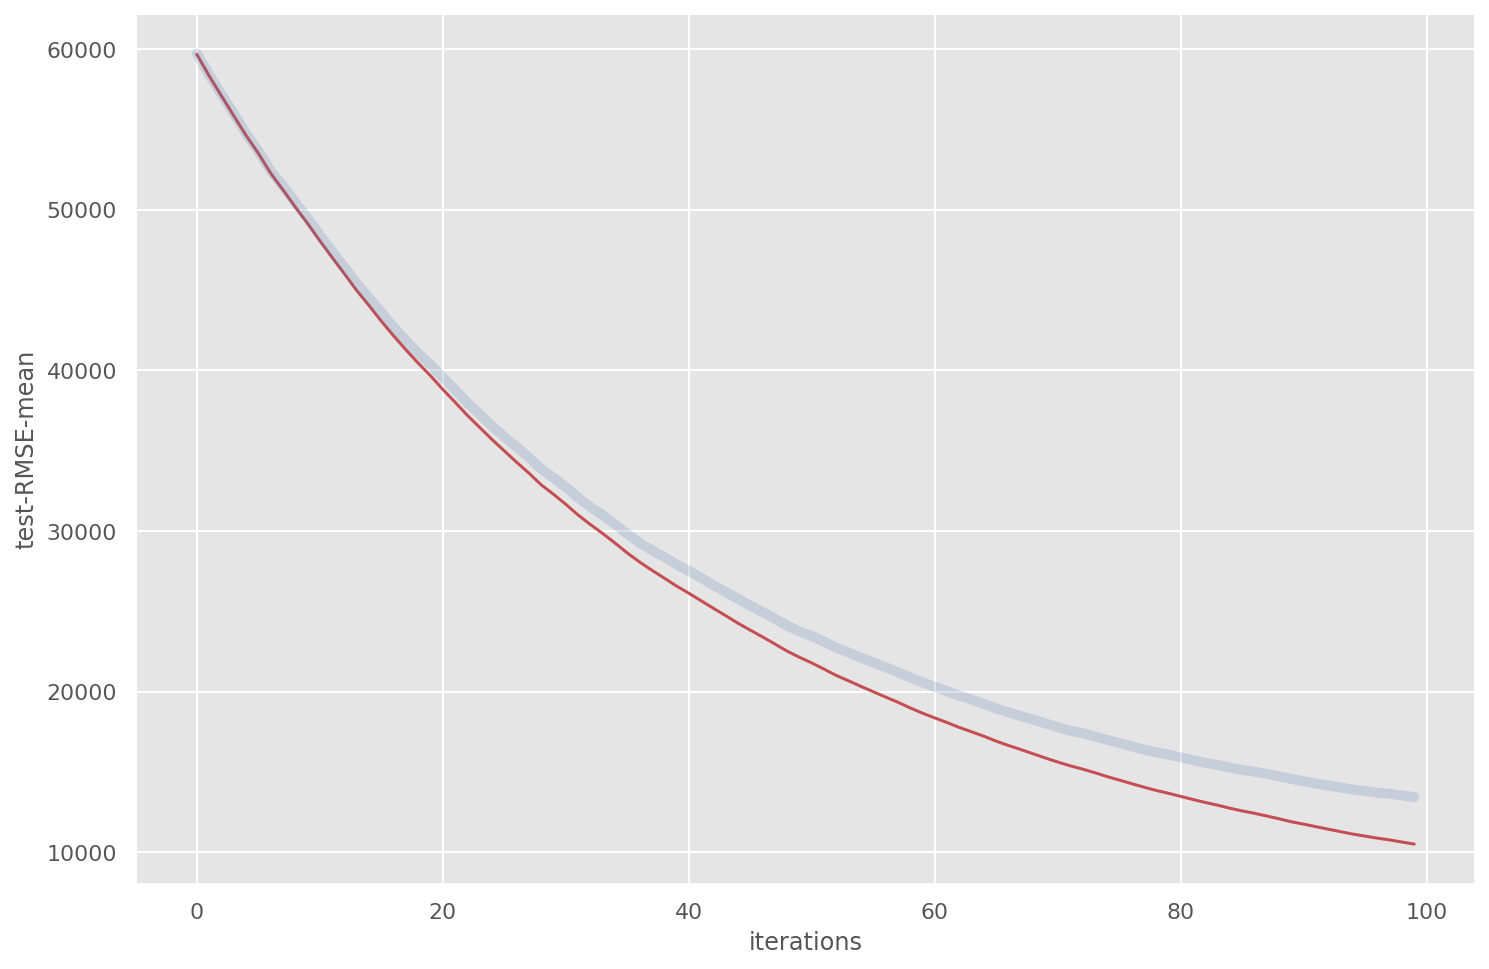

In [57]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(x='iterations',y='train-RMSE-mean',data=df_scores,ax=ax,color='r')
sns.lineplot(x='iterations',y='test-RMSE-mean',data=df_scores,ax=ax,
             color='b',alpha=0.2,linewidth=5,linestyle='--')

# Model Evaluation Using shap
- [official shap github repo](https://github.com/slundberg/shap)
- [catboost tutorials model analysis shap values tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/shap_values_tutorial.ipynb)
- [Kaggle: Machine Learning Interpretability](https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability/comments)

In [0]:
import shap

In [59]:
# fit the model
model = CatBoostRegressor(verbose=1000,random_state=0)
model.fit(df_Xtrain, ytr)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_Xtest)

0:	learn: 54331.7446366	total: 9.9ms	remaining: 9.89s
999:	learn: 1052.9448198	total: 8.63s	remaining: 0us


/usr/local/lib/python3.6/dist-packages/shap/explainers/tree.py:104: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



In [60]:
shap_values.shape, df_Xtest.shape, df_Xtrain.shape

((1366, 45), (1366, 45), (4371, 45))

In [61]:
df_Xtest.head(1)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0                 0                       1                     0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                  0   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                                0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                         0                          0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                   0                                  0   

               coord_ra            coord_dec  parent  deblend_nChild  \
0 0.0008999999845400453 0.003100000089034438 2,350.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0       2,679.167236328125       3,224.177978515625    2,679.016357421875   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     3,224.02880859375   2,679.175537109375    3,224.17236328125   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0       0.09539999812841415       0.11479999870061874 11.751700401306152   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0 17.318300247192383  0.991100013256073      0.5406000018119812   

   base_SdssShape_yySigma  base_SdssShape_xySigma  base_SdssShape_x  \
0      0.4650999903678894      0.7965999841690063  2,679.1630859375   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0 3,224.15966796875     12.084600448608398     11.878100395202637   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     1.0347000360488892         9.999999747378752e-05   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0                           0.0             12.091099739074707   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             11.884300231933594              1.034600019454956   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                  2,679.150390625                  3,224.146484375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                 11.76930046081543                 17.35409927368164   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                0.9948999881744385                                    1.0

In [62]:
df_Xtest.head(1)[['base_GaussianCentroid_x','ext_shapeHSM_HsmPsfMoments_x']]

base_GaussianCentroid_x  ext_shapeHSM_HsmPsfMoments_x
0       2,679.167236328125         9.999999747378752e-05

In [63]:
# load JS visualization code to notebook
shap.initjs()

# Look only first row of test data
# use matplotlib=True to avoid Javascript
shap.force_plot(explainer.expected_value,
                shap_values[0,:],
                df_Xtest.iloc[0,:],
                matplotlib=False,
                text_rotation=90)

# for shap, base value is same for all rows

In [0]:
# the prediction for first row is 4048.58 which is due to alll columns.
#
# red features contribute positive, blue features contribute negative.
# here, first row has base_SdssShape_yy = 17.32,
# which is red and makes overall value more negative than base value.

In [65]:
# load JS visualization code to notebook
shap.initjs()

# visualize the test set predictions
shap.force_plot(explainer.expected_value, shap_values, df_Xtest,matplotlib=False)

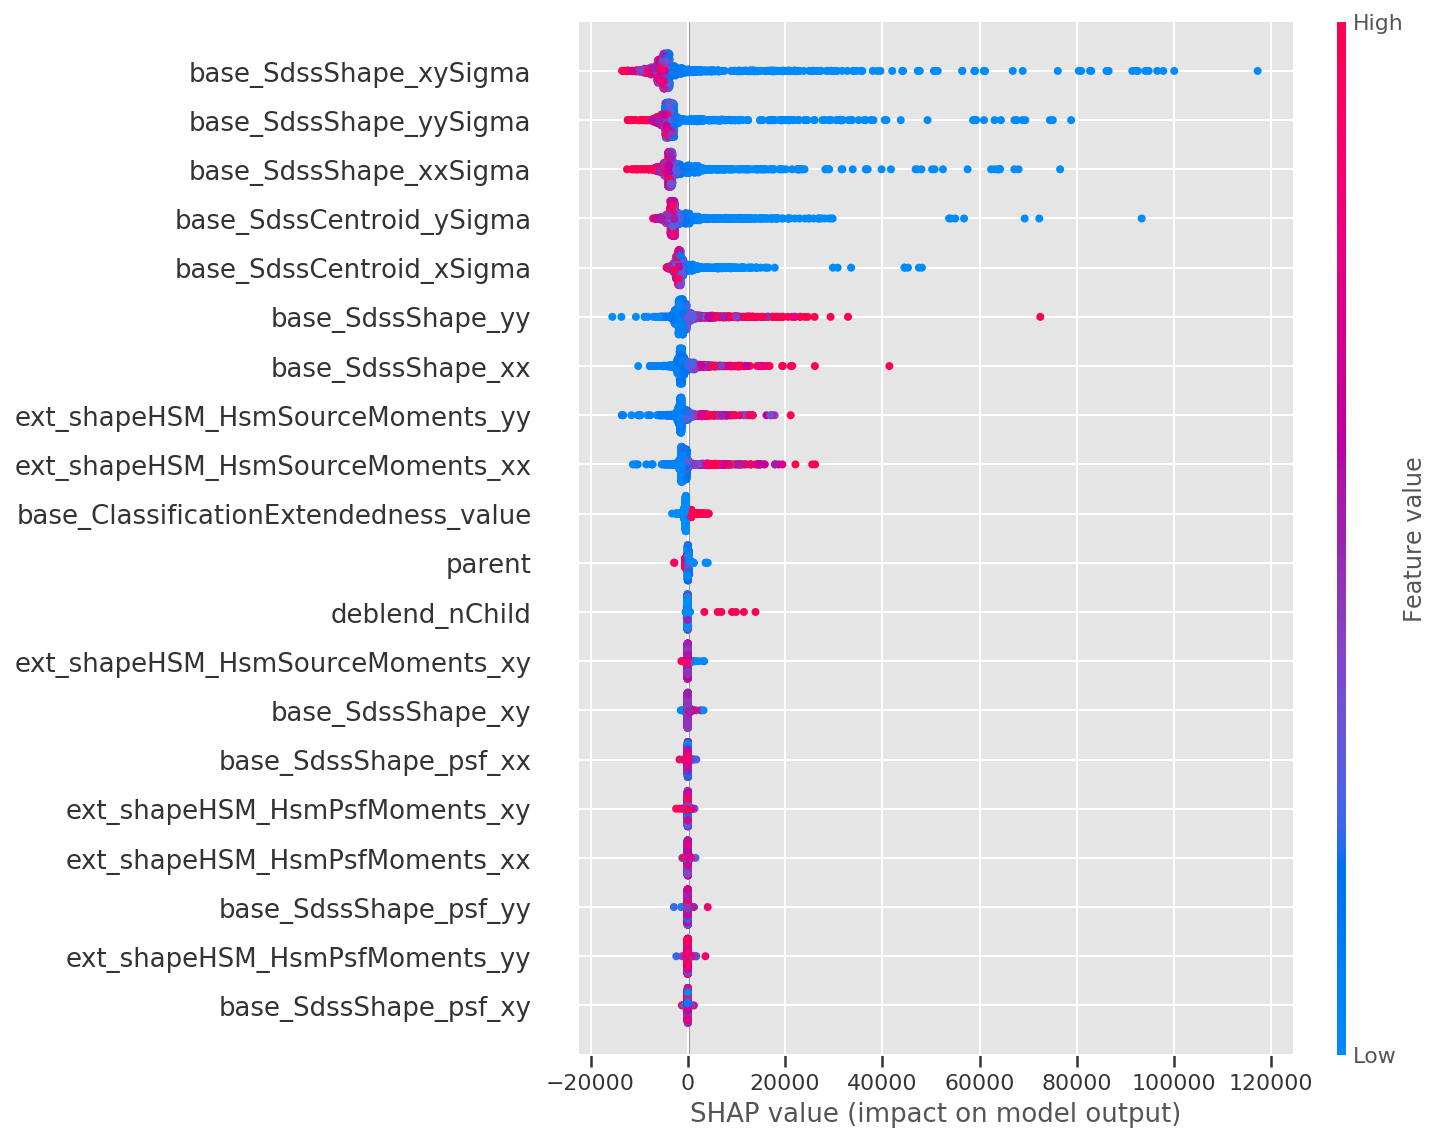

In [66]:
shap.summary_plot(shap_values, df_Xtest)

This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

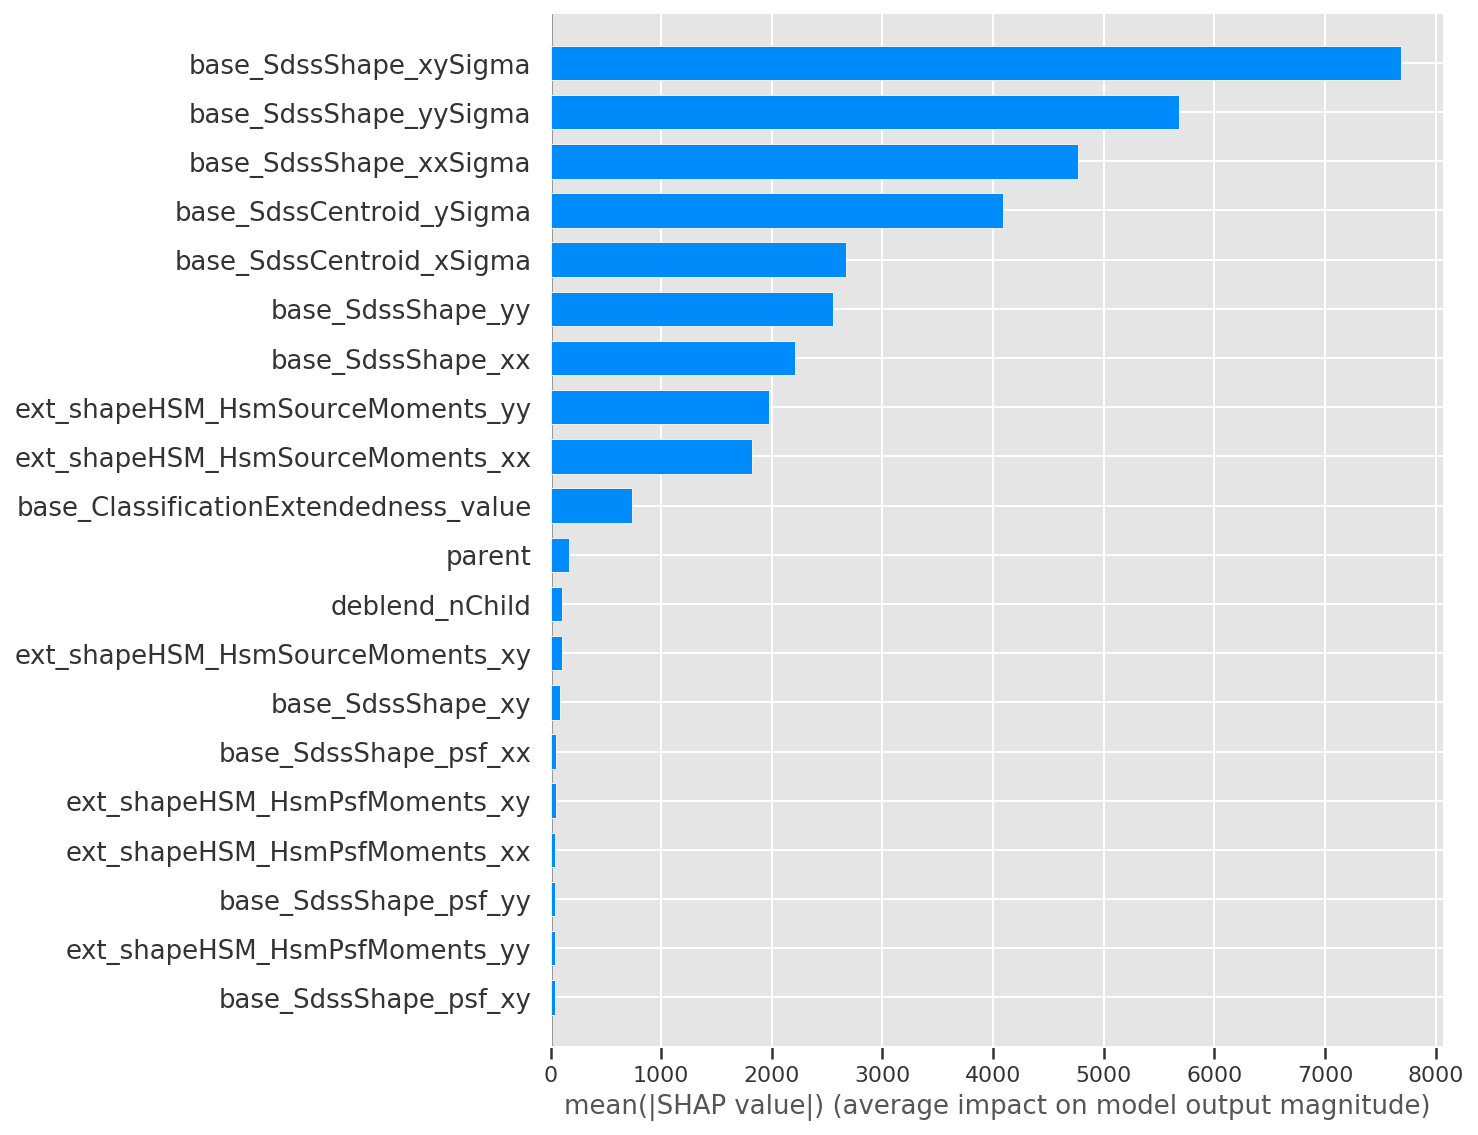

In [67]:
shap.summary_plot(shap_values, df_Xtest, plot_type='bar')

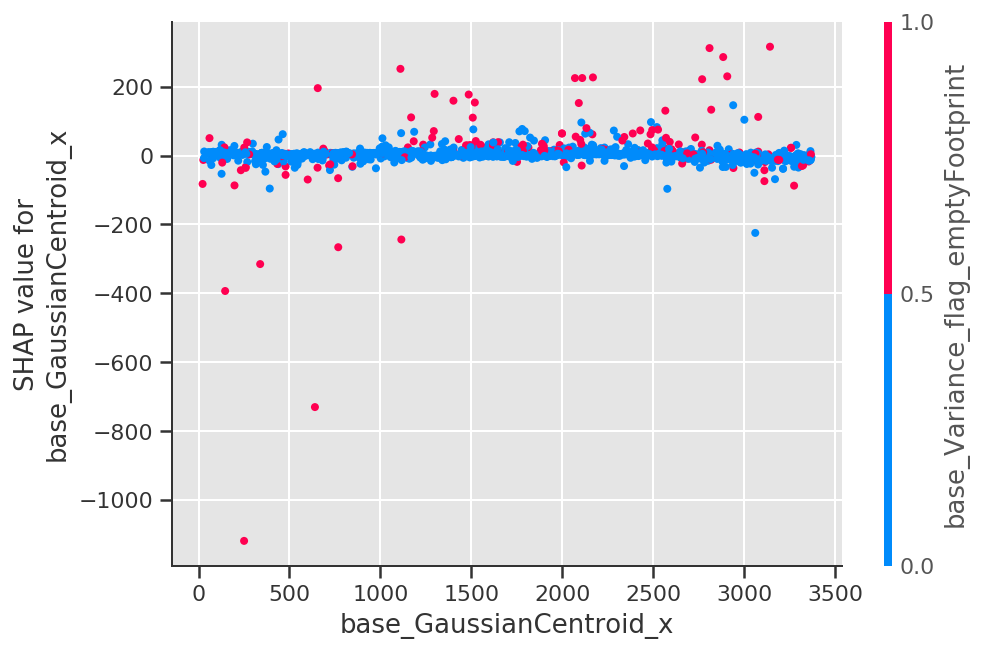

In [68]:
shap.dependence_plot("base_GaussianCentroid_x", shap_values, df_Xtest)

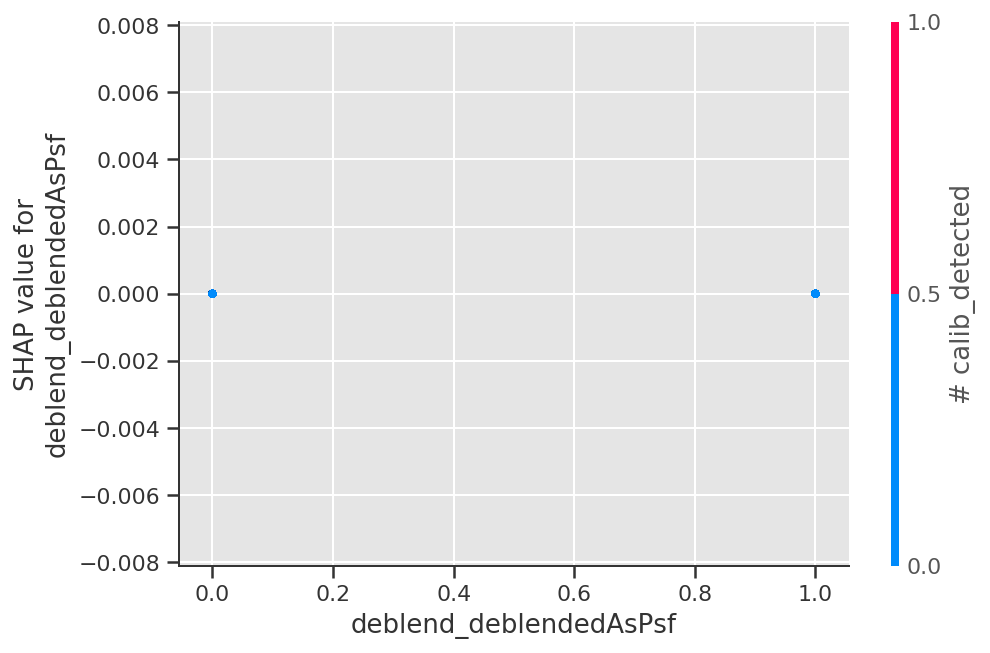

In [69]:
shap.dependence_plot("deblend_deblendedAsPsf", shap_values, df_Xtest)

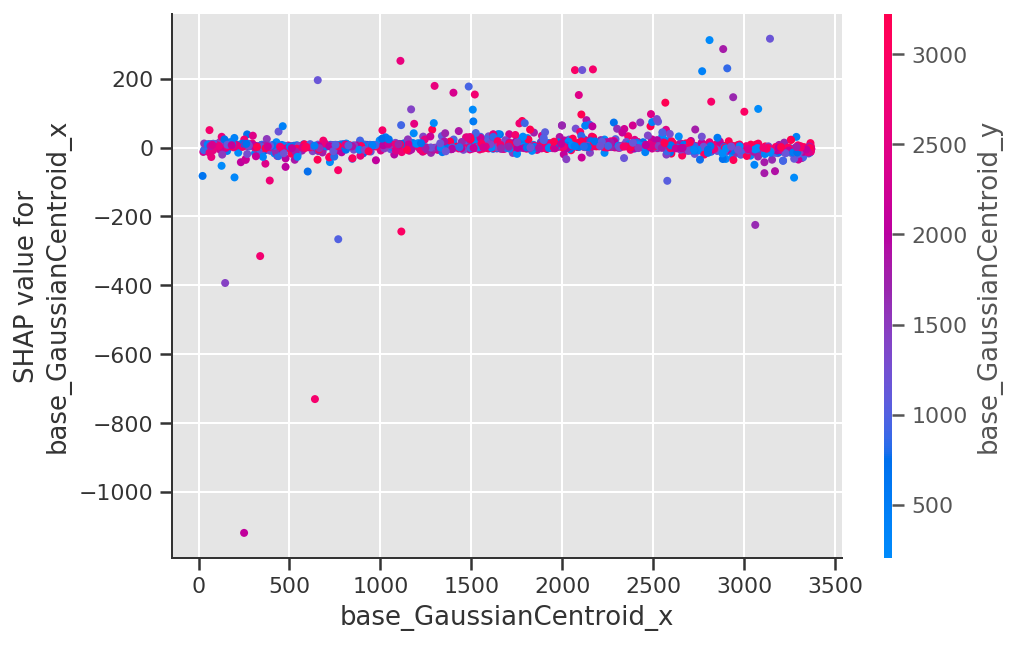

In [70]:
shap.dependence_plot(ind='base_GaussianCentroid_x', interaction_index='base_GaussianCentroid_y',
                     shap_values=shap_values, 
                     features=df_Xtest,  
                     display_features=df_Xtest)

# HPO (Hyper Parameter Optimization)

We generally should optimize model complexity and then tune the convergence.

model complexity: max_depth etc  
convergence: learning rate  

Parameters:
- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.


### Baseline model

In [71]:
df_Xtrain.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0                 0                       0                     1   
1                 0                       1                     0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                    0                          0   
1                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                  1   
1                                  1   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                                1   
1                                                0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                         0                          0   
1                                         1                          0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                   0                                  0   
1                   0                                  0   

               coord_ra             coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516 0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003 0.0024999999441206455 1,879.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0  11.58080005645752 1.4122999906539917     0.17260000109672546   
1  9.030599594116211 0.8830000162124634     0.29820001125335693   

   base_SdssShape_yySigma  base_SdssShape_xySigma    base_SdssShape_x  \
0     0.12700000405311584     0.18400000035762787    915.151123046875   
1     0.21940000355243683       0.319599986076355 1,997.1104736328125   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0   516.87060546875      11.73289966583252     12.412500381469727   
1   2,583.466796875     11.803999900817871     12.268799781799316   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     0.8263000249862671       -0.00039999998989515007   
1      1.048200011253357        -0.0003000000142492354   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0       -0.00019999999494757503             11.739100456237793   
1       -0.00019999999494757503               11.8100004196167   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             12.418100357055664             0.8263999819755554   
1             12.274100303649902               1.04830002784729   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                915.1495971679688                516.8607177734375   
1               1,997.110595703125               2,583.470458984375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                10.874699592590332                11.610799789428711   
1                 8.431900024414062                 9.038900375366211   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                1.4133000373840332                                    0.0  
1                0.8842999935150146                                    0.0

In [0]:
cat_features

In [0]:
cols_low_feat_imp

In [0]:
Xtr = df_Xtrain.drop(cols_low_feat_imp,axis=1)
Xtx = df_Xtest.drop(cols_low_feat_imp,axis=1)
Xvd = df_Xvalid.drop(cols_low_feat_imp,axis=1)

ytr,ytx,yvd = ytrain, ytest,yvalid

In [72]:
# fit the model
model_cat = CatBoostRegressor(verbose=1000,random_state=0)

model_cat.fit(Xtr, ytr)

# fitted model
model = model_cat


# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2, 6)

print('Adjusted R-squared value for test', ar2)

0:	learn: 54375.0445915	total: 8.82ms	remaining: 8.81s
999:	learn: 1059.9303453	total: 7.88s	remaining: 0us
0:	learn: 48148.2441819	total: 7.93ms	remaining: 7.92s
999:	learn: 523.2789028	total: 6.97s	remaining: 0us
0:	learn: 48890.3990845	total: 7.7ms	remaining: 7.69s
999:	learn: 544.6772220	total: 6.9s	remaining: 0us
0:	learn: 52452.9176246	total: 7.78ms	remaining: 7.77s
999:	learn: 617.9036858	total: 6.84s	remaining: 0us
0:	learn: 50757.9058427	total: 7.64ms	remaining: 7.63s
999:	learn: 533.9139114	total: 6.81s	remaining: 0us
0:	learn: 46736.4447875	total: 7.68ms	remaining: 7.68s
999:	learn: 513.2183182	total: 6.9s	remaining: 0us
Adjusted R-squared value for test 0.933626


In [0]:
# show_method_attributes(model)
# model.get_all_params()

In [78]:
"""
First check some iterations:
default iterations = 1000

iterations: 1000, AR2: 0.996800 , Time taken: 0.0 min 8 sec
iterations: 2000, AR2: 0.997400 , Time taken: 0.0 min 16 sec
iterations: 3000, AR2: 0.997500 , Time taken: 0.0 min 24 sec
iterations: 4000, AR2: 0.997500 , Time taken: 0.0 min 32 sec
iterations: 5000, AR2: 0.997513 , Time taken: 0.0 min 40 sec
iterations: 6000, AR2: 0.997521 , Time taken: 0.0 min 49 sec
iterations: 7000, AR2: 0.997525 , Time taken: 0.0 min 57 sec
iterations: 8000, AR2: 0.997528 , Time taken: 1.0 min 4 sec
iterations: 9000, AR2: 0.997529 , Time taken: 1.0 min 12 sec
iterations: 10000, AR2: 0.99753 , Time taken: 1.0 min 19 sec
iterations: 11000, AR2: 0.99753 , Time taken: 1.0 min 26 sec
iterations: 12000, AR2: 0.99753 , Time taken: 1.0 min 34 sec

iterations: 9800, AR2: 0.997529 , Time taken: 1.0 min 15 sec
iterations: 9900, AR2: 0.99753 , Time taken: 1.0 min 16 sec
iterations: 10000, AR2: 0.99753 , Time taken: 1.0 min 17 sec
iterations: 10100, AR2: 0.99753 , Time taken: 1.0 min 18 sec

iterations: 8970, AR2: 0.997529 , Time taken: 1.0 min 9 sec
iterations: 8980, AR2: 0.997529 , Time taken: 1.0 min 9 sec
iterations: 8990, AR2: 0.997529 , Time taken: 1.0 min 9 sec
iterations: 9910, AR2: 0.99753 , Time taken: 1.0 min 16 sec
iterations: 9920, AR2: 0.99753 , Time taken: 1.0 min 16 sec
iterations: 9930, AR2: 0.99753 , Time taken: 1.0 min 16 sec
iterations: 9940, AR2: 0.99753 , Time taken: 1.0 min 16 sec
"""


for iterations in [9900]:
  time_start = time.time()
  param = 'iterations'

  model = CatBoostRegressor(verbose=2000,random_state=0,iterations=iterations)
  model.fit(Xtr, ytr)
  ypreds = model.predict(Xtx)
  r2 = sklearn.metrics.r2_score(ytx, ypreds)
  ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
  ar2 = round(ar2,6)

  time_taken = time.time() - time_start
  m,s = divmod(time_taken,60)
  print(f'{param}: {iterations}, AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

0:	learn: 54375.0445915	total: 8.37ms	remaining: 1m 22s
2000:	learn: 484.3182031	total: 15.1s	remaining: 59.4s
4000:	learn: 198.9030165	total: 30.2s	remaining: 44.5s
6000:	learn: 109.8358734	total: 45.3s	remaining: 29.4s
8000:	learn: 67.6429786	total: 1m	remaining: 14.3s
9899:	learn: 45.9774340	total: 1m 14s	remaining: 0us
iterations: 9900, AR2: 0.99753 , Time taken: 1.0 min 16 sec


# HPO Model Complexity

In [81]:
for n in [5]: # default detpth = 6
    time_start = time.time()
    param = 'depth'
    model = CatBoostRegressor(verbose=False,random_state=0,
                              iterations=9900,
                              depth=n,
                              )
    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
    ar2 = round(ar2,6)

    time_taken = time.time() - time_start
    m,s = divmod(time_taken,60)
    print(f'{param}: {n}, AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

"""
depth: 4, AR2: 0.997916 , Time taken: 0.0 min 40 sec
depth: 5, AR2: 0.998133 , Time taken: 0.0 min 51 sec
depth: 6, AR2: 0.99753 , Time taken: 0.0 min 59 sec
depth: 7, AR2: 0.99715 , Time taken: 1.0 min 11 sec
depth: 8, AR2: 0.996277 , Time taken: 1.0 min 17 sec
depth: 9, AR2: 0.993865 , Time taken: 1.0 min 21 sec
""";

depth: 5, AR2: 0.998133 , Time taken: 0.0 min 51 sec


## HPO Model Regularization

In [84]:
for n in [2,3,4]: # default l2_leaf_reg = 3
    time_start = time.time()
    param = 'l2_leaf_reg'
    model = CatBoostRegressor(verbose=False,random_state=0,
                              iterations=9900,
                              depth=5,
                              l2_leaf_reg=n,
                              )
    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
    ar2 = round(ar2,6)

    time_taken = time.time() - time_start
    m,s = divmod(time_taken,60)
    print(f'{param}: {n}, AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

"""
l2_leaf_reg: 2, AR2: 0.998358 , Time taken: 0.0 min 51 sec **best
l2_leaf_reg: 3, AR2: 0.998133 , Time taken: 0.0 min 50 sec
l2_leaf_reg: 4, AR2: 0.997637 , Time taken: 0.0 min 50 sec
""";

l2_leaf_reg: 2, AR2: 0.998358 , Time taken: 0.0 min 51 sec
l2_leaf_reg: 3, AR2: 0.998133 , Time taken: 0.0 min 50 sec
l2_leaf_reg: 4, AR2: 0.997637 , Time taken: 0.0 min 50 sec


# Model Regularization using model.grid_search

In [85]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=9900,
                            depth=5,
                            l2_leaf_reg= 2
                            )

# do not fit the model here
# let the grid search fit itself.

grid = {'learning_rate': [0.03, 0.1], # 0.02999999933
        'subsample': [0.8, 0.7, 0.6,0.85,0.9,1], # default 0.8

        }

dict_grid_search_result = model.grid_search(grid,
                                       X=Xtr, 
                                       y=ytr, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 8733.8985759	best: 8733.8985759 (0)	total: 49.1s	remaining: 9m
1:	loss: 9007.9872957	best: 8733.8985759 (0)	total: 1m 38s	remaining: 8m 12s
2:	loss: 8600.9265114	best: 8600.9265114 (2)	total: 2m 27s	remaining: 7m 21s
3:	loss: 9219.2296976	best: 8600.9265114 (2)	total: 3m 16s	remaining: 6m 32s
4:	loss: 8648.4152213	best: 8600.9265114 (2)	total: 4m 4s	remaining: 5m 42s
5:	loss: 9431.7088457	best: 8600.9265114 (2)	total: 4m 53s	remaining: 4m 53s
6:	loss: 8510.5642525	best: 8510.5642525 (6)	total: 5m 43s	remaining: 4m 5s
7:	loss: 9633.2756206	best: 8510.5642525 (6)	total: 6m 32s	remaining: 3m 16s
8:	loss: 8712.5671297	best: 8510.5642525 (6)	total: 7m 22s	remaining: 2m 27s
9:	loss: 9570.3970492	best: 8510.5642525 (6)	total: 8m 12s	remaining: 1m 38s
10:	loss: 8438.1871304	best: 8438.1871304 (10)	total: 9m	remaining: 49.1s
11:	loss: 8551.3948586	best: 8438.1871304 (10)	total: 9m 48s	remaining: 0us
Estimating final quality...


In [86]:
dict_grid_search_result.keys()

dict_keys(['params', 'cv_results'])

In [87]:
dict_grid_search_result['params']

{'learning_rate': 0.03, 'subsample': 1}

In [88]:
dict_cv_results = dict_grid_search_result['cv_results']

dict_cv_results.keys()

dict_keys(['iterations', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean', 'train-RMSE-std'])

In [89]:
df_grid_search_cv = pd.DataFrame(dict_cv_results)

df_grid_search_cv.head()

iterations      test-RMSE-mean      test-RMSE-std     train-RMSE-mean  \
0           0   59,535.7736713671 5,475.929397667225 59,661.185219844745   
1           1  58,063.88216188401 5,312.340142112536  58,162.07150621106   
2           2  56,722.13047590744  5,115.07263334028  56,775.52447507691   
3           3 55,388.473664464276 4,959.502640393538  55,424.78030441558   
4           4  54,052.45591085018 4,680.762265271847  54,078.56422419596   

      train-RMSE-std  
0  2,836.31214676704  
1 2,713.377356122316  
2  2,600.95530638966  
3 2,460.358142918717  
4  2,429.71873225752

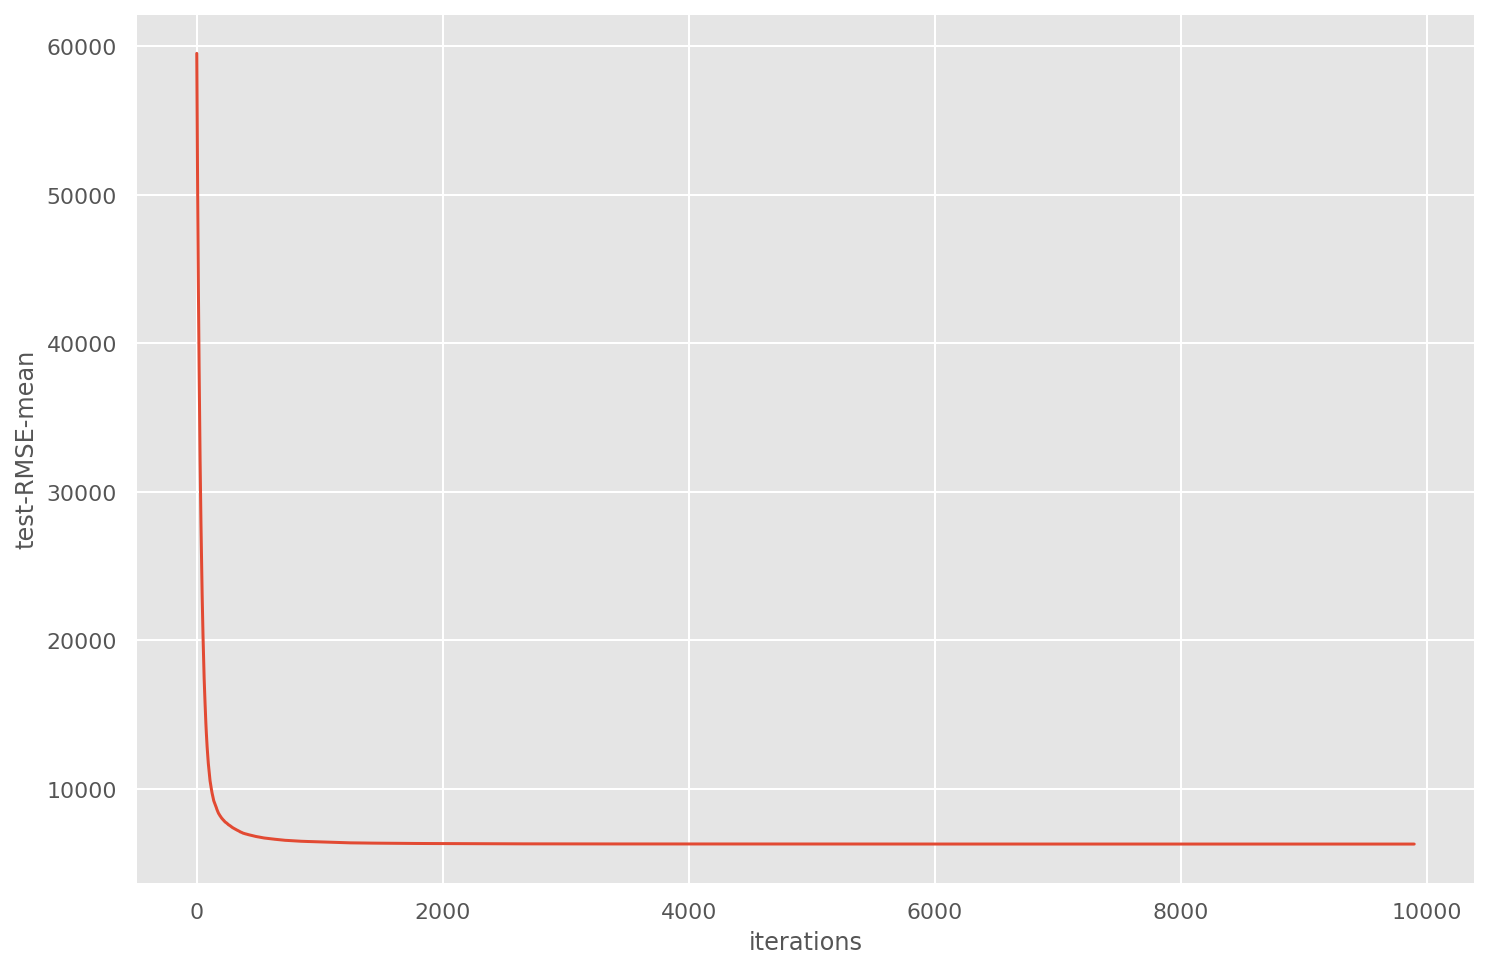

In [90]:
sns.lineplot(x='iterations',y='test-RMSE-mean', data=df_grid_search_cv)

In [0]:
time_start = time.time()
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=9900,
                            depth=5,
                            l2_leaf_reg=2,
                            learning_rate= 0.03,
                            subsample= 1,
                            )
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

ar2 = round(ar2,6)

time_taken = time.time() - time_start
m,s = divmod(time_taken,60)
print(f'AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

# lr = 0.03 and subsample = 1 gave me worse result, I will not use them.

In [94]:
time_start = time.time()

model = CatBoostRegressor(verbose=1000,random_state=0,
                            iterations=9900,
                            depth=5,
                            l2_leaf_reg=2,
                            learning_rate= 0.03,
                            subsample= 0.8, # default
                            )
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2,6)

time_taken = time.time() - time_start
m,s = divmod(time_taken,60)
print(f'AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

0:	learn: 54374.6239730	total: 6.01ms	remaining: 59.5s
1000:	learn: 1154.2248734	total: 5.13s	remaining: 45.6s
2000:	learn: 562.4291124	total: 10.3s	remaining: 40.8s
3000:	learn: 357.3795860	total: 15.5s	remaining: 35.6s
4000:	learn: 253.7758388	total: 20.7s	remaining: 30.5s
5000:	learn: 193.0169335	total: 25.9s	remaining: 25.4s
6000:	learn: 152.5344434	total: 31.1s	remaining: 20.2s
7000:	learn: 123.0890187	total: 36.3s	remaining: 15s
8000:	learn: 101.3585821	total: 41.5s	remaining: 9.85s
9000:	learn: 84.5711692	total: 46.7s	remaining: 4.67s
9899:	learn: 72.8437459	total: 51.4s	remaining: 0us
AR2: 0.998358 , Time taken: 0.0 min 52 sec


## Using Early Stopping from Validation Set

In [95]:
df_Xtrain.head(2)

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
0                 0                       0                     1   
1                 0                       1                     0   

   base_SdssShape_flag  base_SdssShape_flag_shift  \
0                    0                          0   
1                    0                          0   

   ext_shapeHSM_HsmShapeRegauss_flag  \
0                                  1   
1                                  1   

   ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
0                                                1   
1                                                0   

   ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
0                                         0                          0   
1                                         1                          0   

   base_Variance_flag  base_Variance_flag_emptyFootprint  \
0                   0                                  0   
1                   0                                  0   

               coord_ra             coord_dec  parent  deblend_nChild  \
0 0.0026000000070780516 0.0005000000237487257     0.0             2.0   
1 0.0015999999595806003 0.0024999999441206455 1,879.0             0.0   

   base_GaussianCentroid_x  base_GaussianCentroid_y  base_NaiveCentroid_x  \
0         915.149169921875          516.86181640625     914.9971923828125   
1        1,997.11279296875       2,583.473876953125   1,996.9952392578125   

   base_NaiveCentroid_y  base_SdssCentroid_x  base_SdssCentroid_y  \
0     516.0540771484375    915.1525268554688    516.8812866210938   
1    2,583.038818359375  1,997.1104736328125    2,583.46337890625   

   base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  base_SdssShape_xx  \
0      0.030799999833106995       0.03280000016093254 10.863699913024902   
1       0.06239999830722809       0.06469999998807907  8.426400184631348   

   base_SdssShape_yy  base_SdssShape_xy  base_SdssShape_xxSigma  \
0  11.58080005645752 1.4122999906539917     0.17260000109672546   
1  9.030599594116211 0.8830000162124634     0.29820001125335693   

   base_SdssShape_yySigma  base_SdssShape_xySigma    base_SdssShape_x  \
0     0.12700000405311584     0.18400000035762787    915.151123046875   
1     0.21940000355243683       0.319599986076355 1,997.1104736328125   

   base_SdssShape_y  base_SdssShape_psf_xx  base_SdssShape_psf_yy  \
0   516.87060546875      11.73289966583252     12.412500381469727   
1   2,583.466796875     11.803999900817871     12.268799781799316   

   base_SdssShape_psf_xy  ext_shapeHSM_HsmPsfMoments_x  \
0     0.8263000249862671       -0.00039999998989515007   
1      1.048200011253357        -0.0003000000142492354   

   ext_shapeHSM_HsmPsfMoments_y  ext_shapeHSM_HsmPsfMoments_xx  \
0       -0.00019999999494757503             11.739100456237793   
1       -0.00019999999494757503               11.8100004196167   

   ext_shapeHSM_HsmPsfMoments_yy  ext_shapeHSM_HsmPsfMoments_xy  \
0             12.418100357055664             0.8263999819755554   
1             12.274100303649902               1.04830002784729   

   ext_shapeHSM_HsmSourceMoments_x  ext_shapeHSM_HsmSourceMoments_y  \
0                915.1495971679688                516.8607177734375   
1               1,997.110595703125               2,583.470458984375   

   ext_shapeHSM_HsmSourceMoments_xx  ext_shapeHSM_HsmSourceMoments_yy  \
0                10.874699592590332                11.610799789428711   
1                 8.431900024414062                 9.038900375366211   

   ext_shapeHSM_HsmSourceMoments_xy  base_ClassificationExtendedness_value  
0                1.4133000373840332                                    0.0  
1                0.8842999935150146                                    0.0

In [96]:
params = dict(verbose=500,
              random_state=0,
              iterations=9900,
              depth=5,
              l2_leaf_reg=2,
              learning_rate= 0.03,
              subsample= 0.8,
              eval_metric='RMSE',
              cat_features = cat_features,
              early_stopping_rounds=200,
            )


model = catboost.CatBoostRegressor(**params)

model.fit(df_Xtrain, ytrain, 
          eval_set=(df_Xvalid, yvalid), 
          use_best_model=True, 
          plot=False
         );

0:	learn: 54303.1909616	test: 50996.4222889	best: 50996.4222889 (0)	total: 6.23ms	remaining: 1m 1s
500:	learn: 2216.9775837	test: 5177.2316853	best: 5177.2316853 (500)	total: 2.9s	remaining: 54.3s
1000:	learn: 1183.1160124	test: 4608.8446413	best: 4608.7996795 (999)	total: 5.83s	remaining: 51.8s
1500:	learn: 796.4270926	test: 4485.4537256	best: 4485.4537256 (1500)	total: 8.76s	remaining: 49s
2000:	learn: 583.8220412	test: 4450.4316796	best: 4450.4098233 (1997)	total: 11.7s	remaining: 46.3s
2500:	learn: 454.3865668	test: 4425.5126870	best: 4425.5012260 (2498)	total: 14.6s	remaining: 43.3s
3000:	learn: 368.8357702	test: 4415.4406279	best: 4415.2728098 (2974)	total: 17.6s	remaining: 40.5s
3500:	learn: 308.5503239	test: 4407.6571553	best: 4407.6321656 (3499)	total: 20.5s	remaining: 37.5s
4000:	learn: 264.8370494	test: 4406.9260158	best: 4406.6617536 (3920)	total: 23.4s	remaining: 34.5s
4500:	learn: 229.0811245	test: 4405.7774076	best: 4405.2686652 (4420)	total: 26.4s	remaining: 31.6s
Stopp

In [0]:
# show_method_attributes(model)

In [98]:
model.get_params()

{'cat_features': ['# calib_detected',
  'deblend_tooManyPeaks',
  'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
  'base_Variance_flag'],
 'depth': 5,
 'early_stopping_rounds': 200,
 'eval_metric': 'RMSE',
 'iterations': 9900,
 'l2_leaf_reg': 2,
 'learning_rate': 0.03,
 'loss_function': 'RMSE',
 'random_state': 0,
 'subsample': 0.8,
 'verbose': 500}

In [102]:
time_start = time.time()

params = model.get_params()
params['iterations'] = 9900
params['cat_features'] = cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2,6)

time_taken = time.time() - time_start
m,s = divmod(time_taken,60)
print(f'AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

0:	learn: 54346.5242754	total: 5.67ms	remaining: 56.1s
500:	learn: 2068.6168474	total: 2.52s	remaining: 47.4s
1000:	learn: 1138.6061872	total: 5.04s	remaining: 44.9s
1500:	learn: 775.6124424	total: 7.57s	remaining: 42.4s
2000:	learn: 575.9657375	total: 10.1s	remaining: 40s
2500:	learn: 452.0813782	total: 12.7s	remaining: 37.5s
3000:	learn: 366.7916718	total: 15.2s	remaining: 34.9s
3500:	learn: 304.3772752	total: 17.7s	remaining: 32.4s
4000:	learn: 256.9029888	total: 20.3s	remaining: 29.9s
4500:	learn: 219.2764375	total: 22.8s	remaining: 27.3s
5000:	learn: 190.7378245	total: 25.3s	remaining: 24.8s
5500:	learn: 168.3437744	total: 27.9s	remaining: 22.3s
6000:	learn: 149.2587084	total: 30.4s	remaining: 19.8s
6500:	learn: 132.9940206	total: 32.9s	remaining: 17.2s
7000:	learn: 119.4921251	total: 35.5s	remaining: 14.7s
7500:	learn: 108.5699015	total: 38s	remaining: 12.2s
8000:	learn: 99.0146455	total: 40.6s	remaining: 9.63s
8500:	learn: 90.6396314	total: 43.1s	remaining: 7.09s
9000:	learn: 83

# Try Your luck with different random states

In [104]:
for n in [0]:
    time_start = time.time()
    param = 'seed'

    params ={'depth': 5,
    'iterations':9900,
    'l2_leaf_reg': 2,
    'learning_rate': 0.03,
    'loss_function': 'RMSE',
    'random_state': n,
    'subsample': 0.8,
    'verbose': 1000}

    model = catboost.CatBoostRegressor(**params)

    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
    ar2 = round(ar2,6)

    time_taken = time.time() - time_start
    m,s = divmod(time_taken,60)
    print(f'{param}: {n}, AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

"""
seed:  0,     AR2: 0.998358 , Time taken: 0.0 min 51 sec **best
seed: 42,     AR2: 0.997854 , Time taken: 0.0 min 51 sec
seed:  100,   AR2: 0.99801 , Time taken: 0.0 min 51 sec
seed:  314,   AR2: 0.997805 , Time taken: 0.0 min 51 sec
seed:  31416, AR2: 0.998228 , Time taken: 0.0 min 51 sec
seed:  123,   AR2: 0.997506 , Time taken: 0.0 min 51 sec
seed:  12345, AR2: 0.998012 , Time taken: 0.0 min 51 sec
seed:  111,   AR2: 0.997686 , Time taken: 0.0 min 51 sec

""";

0:	learn: 54374.6239730	total: 6.44ms	remaining: 1m 3s
1000:	learn: 1154.2248734	total: 5.05s	remaining: 44.9s
2000:	learn: 562.4291124	total: 10.1s	remaining: 39.7s
3000:	learn: 357.3795860	total: 15.1s	remaining: 34.7s
4000:	learn: 253.7758388	total: 20.1s	remaining: 29.7s
5000:	learn: 193.0169335	total: 25.2s	remaining: 24.7s
6000:	learn: 152.5344434	total: 30.3s	remaining: 19.7s
7000:	learn: 123.0890187	total: 35.3s	remaining: 14.6s
8000:	learn: 101.3585821	total: 40.4s	remaining: 9.58s
9000:	learn: 84.5711692	total: 45.5s	remaining: 4.54s
9899:	learn: 72.8437459	total: 50.1s	remaining: 0us
seed: 0, AR2: 0.998358 , Time taken: 0.0 min 51 sec


'\nseed:  0,     AR2: 0.998358 , Time taken: 0.0 min 51 sec **best\nseed: 42,     AR2: 0.997854 , Time taken: 0.0 min 51 sec\nseed:  100,   AR2: 0.99801 , Time taken: 0.0 min 51 sec\nseed:  314,   AR2: 0.997805 , Time taken: 0.0 min 51 sec\nseed:  31416, AR2: 0.998228 , Time taken: 0.0 min 51 sec\nseed:  123,   AR2: 0.997506 , Time taken: 0.0 min 51 sec\nseed:  12345, AR2: 0.998012 , Time taken: 0.0 min 51 sec\nseed:  111,   AR2: 0.997686 , Time taken: 0.0 min 51 sec\n\n'

# Best Model

In [106]:
time_start = time.time()

Xtr = df_Xtrain
Xtx = df_Xtest

params ={'depth': 5,
'eval_metric': 'RMSE',
'iterations':9900,
'l2_leaf_reg': 2,
'learning_rate': 0.03,
'loss_function': 'RMSE',
'random_state': 0,
'subsample': 0.8,
'verbose': False}

cat_features = cat_features
params['cat_features'] = cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])
ar2 = round(ar2,6)

time_taken = time.time() - time_start
m,s = divmod(time_taken,60)
print(f'AR2: {ar2} , Time taken: {m} min {s:.0f} sec')

AR2: 0.997856 , Time taken: 0.0 min 57 sec


# Feature Importance

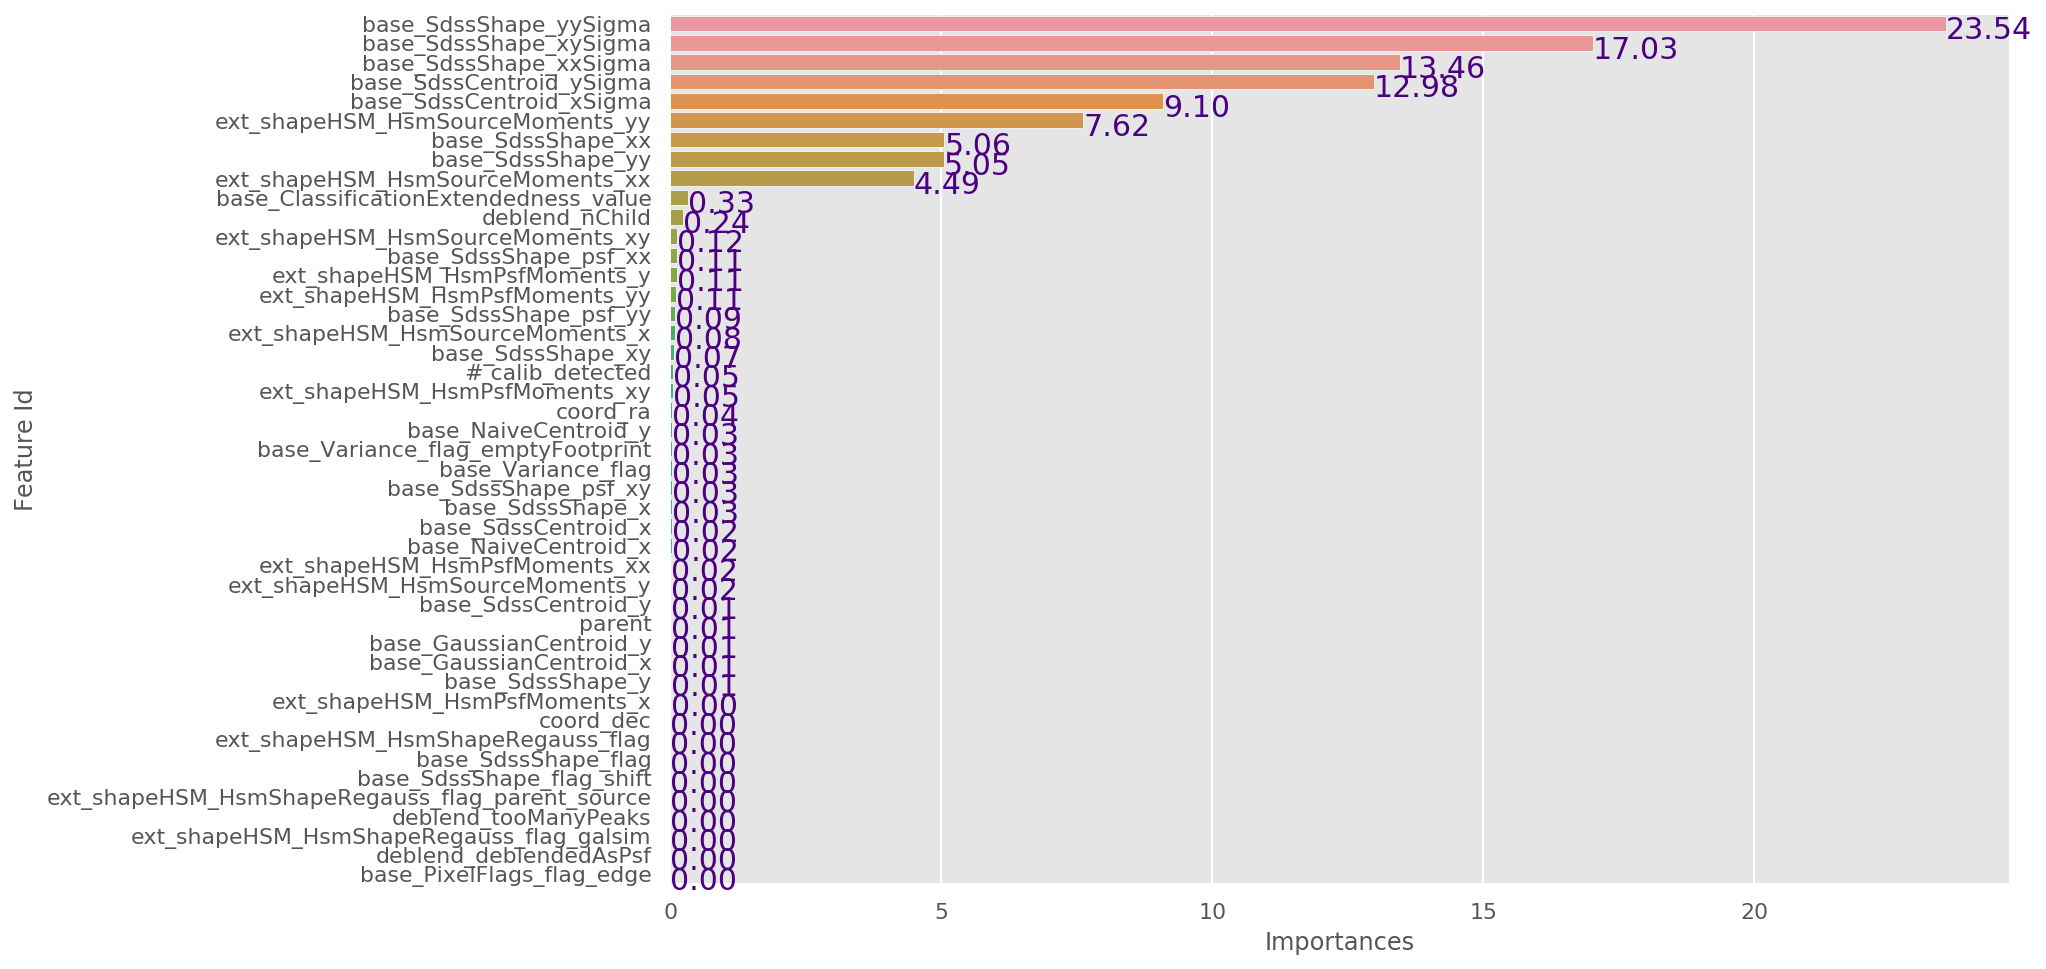

In [112]:
df_fimp = model.get_feature_importance(prettified=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Importances", y="Feature Id", data=df_fimp);

for p in ax.patches:
    x = p.get_width()
    y = p.get_y()
    text = '{:.2f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo',va='top',ha='left')

In [113]:
cat_features

['# calib_detected',
 'deblend_tooManyPeaks',
 'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
 'base_Variance_flag']

# Model Explanation

In [116]:
import eli5

eli5.show_weights(model)

Using TensorFlow backend.


In [117]:
df_fimp = model.get_feature_importance(prettified=True)[['Importances','Feature Id']]
df_fimp.style.background_gradient(subset=['Importances'])